In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis-Copy2.csv') 

In [3]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [6]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: effective_to_date
Non-Null Count  Dtype         
--------------  -----         
9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


In [8]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
def numerical_categorical_split(df):
    numerical = df.select_dtypes(include=['number', 'datetime']).columns
    categorical = df.select_dtypes(include='object').columns
    
    numerical_df = df[numerical]
    categorical_df = df[categorical]
    
    return numerical_df, categorical_df

In [10]:
numerical_df, categorical_df = numerical_categorical_split(customer_df)

In [11]:
numerical_df.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879


In [12]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [13]:
categorical_df = categorical_df.drop('customer', axis=1)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


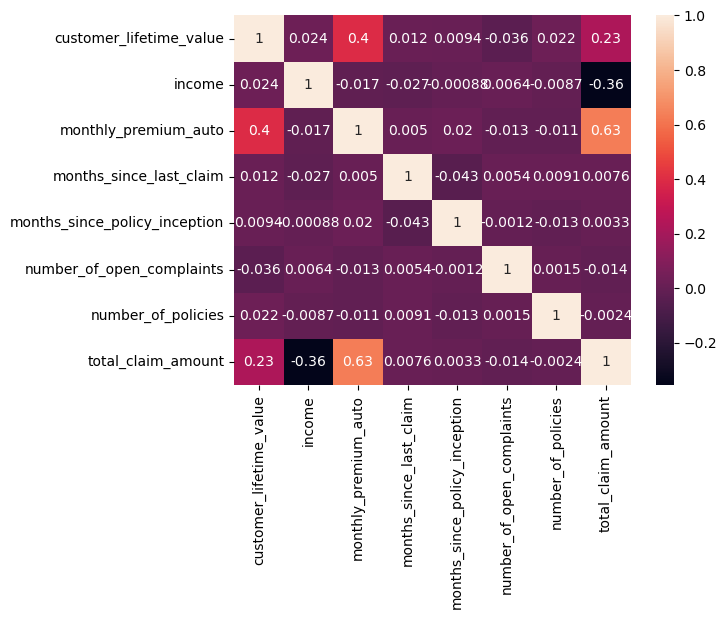

In [14]:
correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [15]:
#the cost of monthly auto insurance is generally related to the insured's claims history. In general, the greater the number of 
#claims an insured has filed in the past, the higher their monthly premium for auto insurance. 

In [16]:
def separate_numerical_columns(df, unique_count=36):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    for column in df.columns:
        if df[column].dtype != 'object':
            unique_values = df[column].nunique()
            if unique_values > unique_count:
                continuous_df[column] = df[column]
            else:
                discrete_df[column] = df[column]
                
    return continuous_df, discrete_df

In [17]:
continuous_df, discrete_df = separate_numerical_columns(numerical_df)

In [18]:
continuous_df.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,2011-02-24,56274,69,5,384.811147
1,6979.535903,2011-01-31,0,94,42,1131.464935
2,12887.431650,2011-02-19,48767,108,38,566.472247
3,7645.861827,2011-01-20,0,106,65,529.881344
4,2813.692575,2011-02-03,43836,73,44,138.130879


In [19]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [20]:
def create_barplot(df):
    for col in df.columns:
        sns.countplot(x=col, data=df)
    sns.set(rc={'figure.figsize':(16,16)})
    plt.tight_layout()
    return

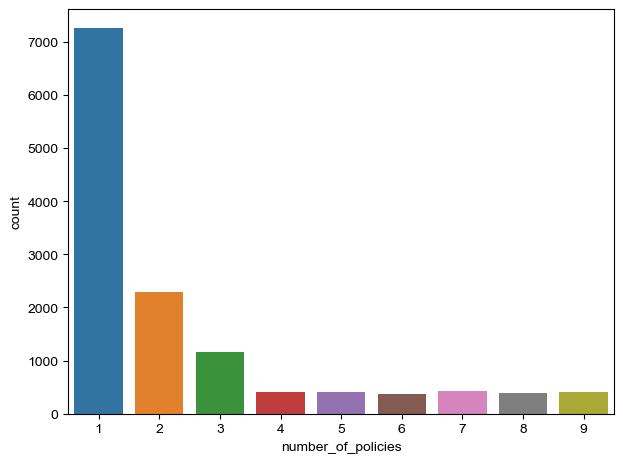

In [21]:
create_barplot(discrete_df)

In [22]:
def create_histogram(df):
    for col in df.columns:
        sns.histplot(df[col], kde=False)
    
    sns.set(rc={'figure.figsize':(16,16)})
    plt.tight_layout()
    return

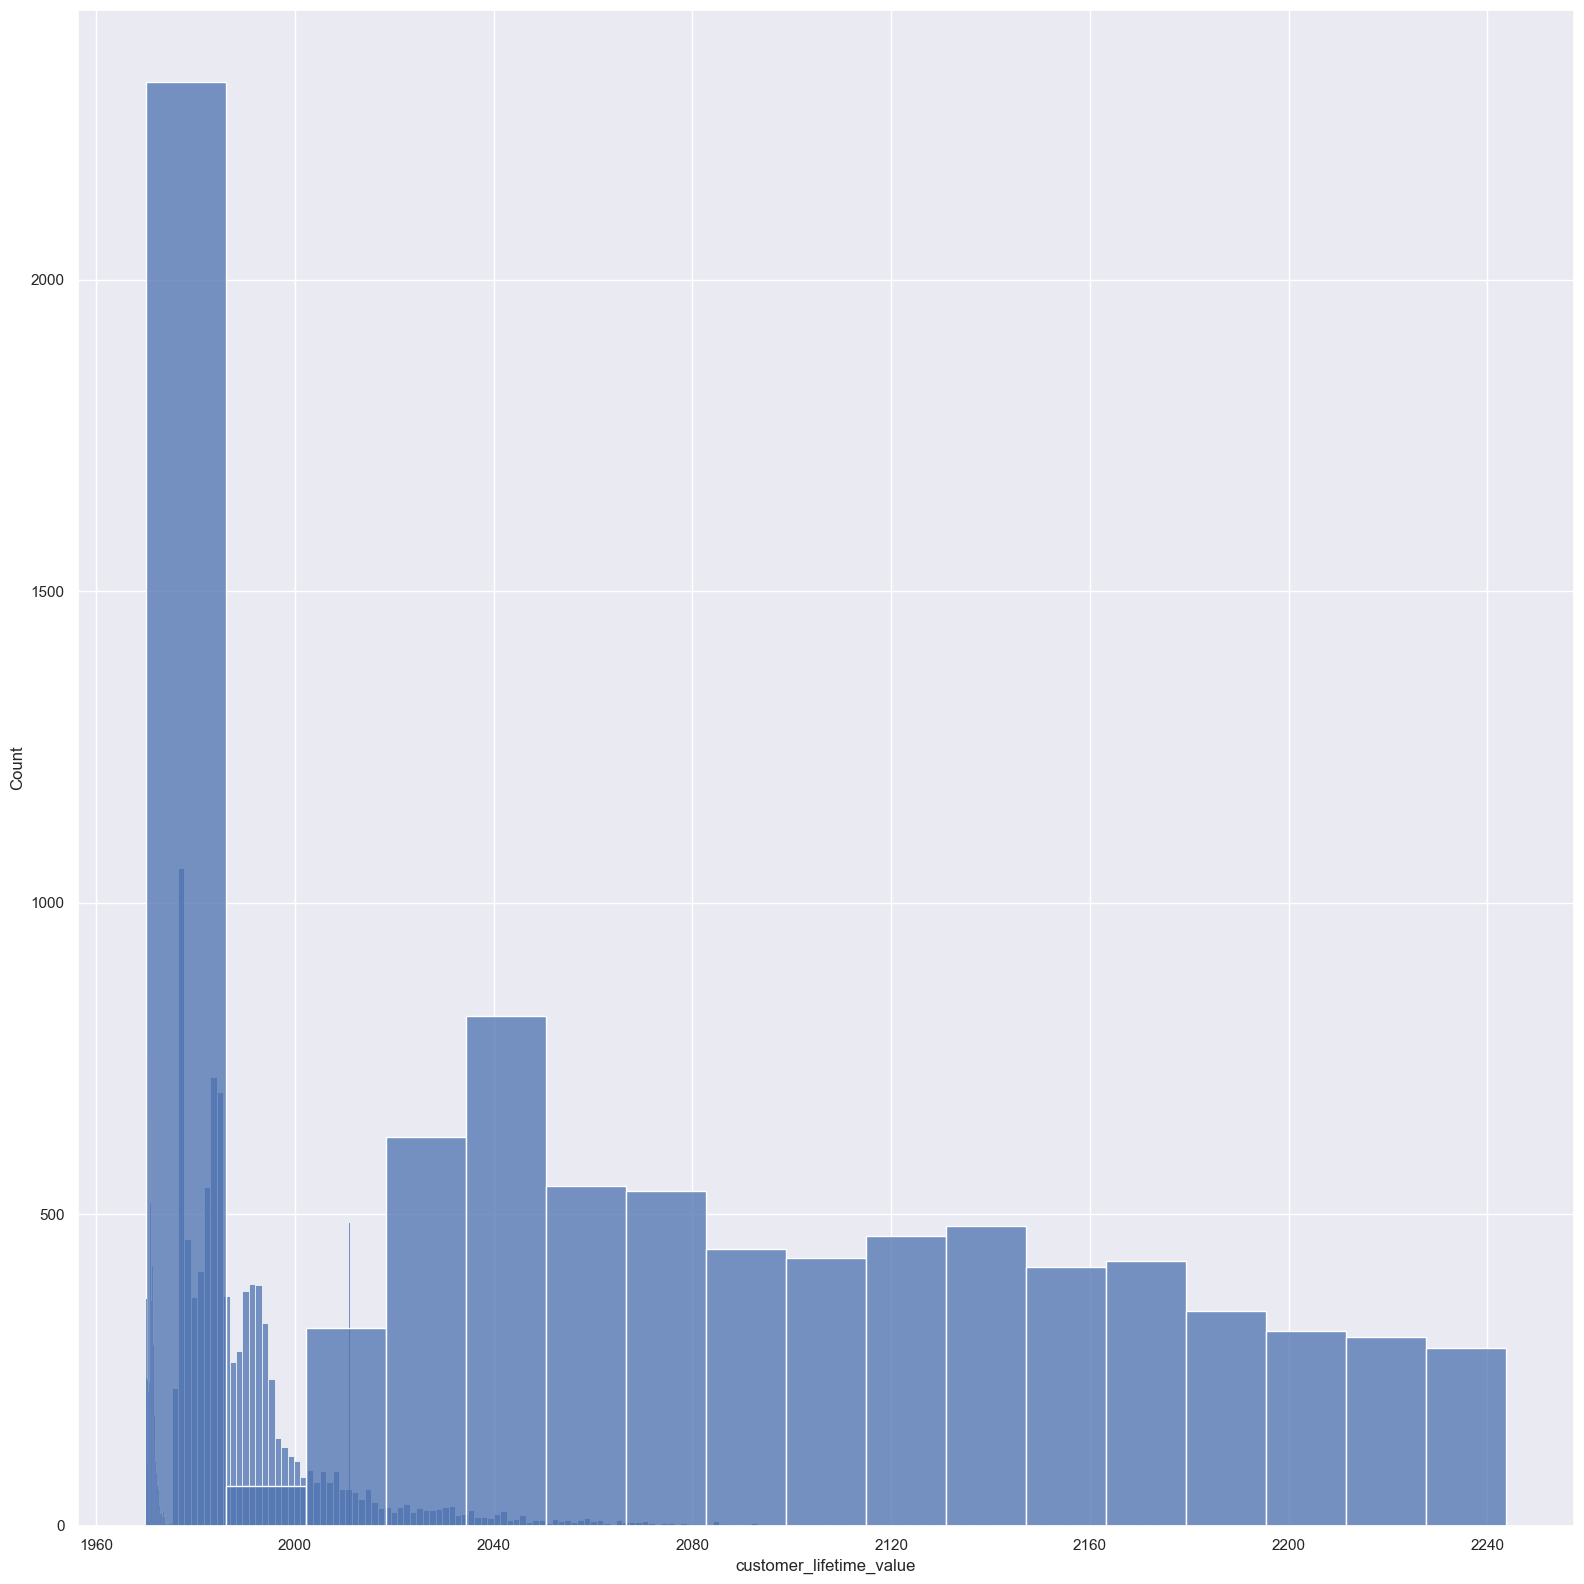

In [23]:
create_histogram(continuous_df)

In [24]:
#Yes, I'll apply tranformation in both of them

In [25]:
def create_boxplot(df):
    sns.set(rc={'figure.figsize':(16,16)})
    for col in df.select_dtypes(include='number'):
        sns.boxplot(data=df, x=col)
    return

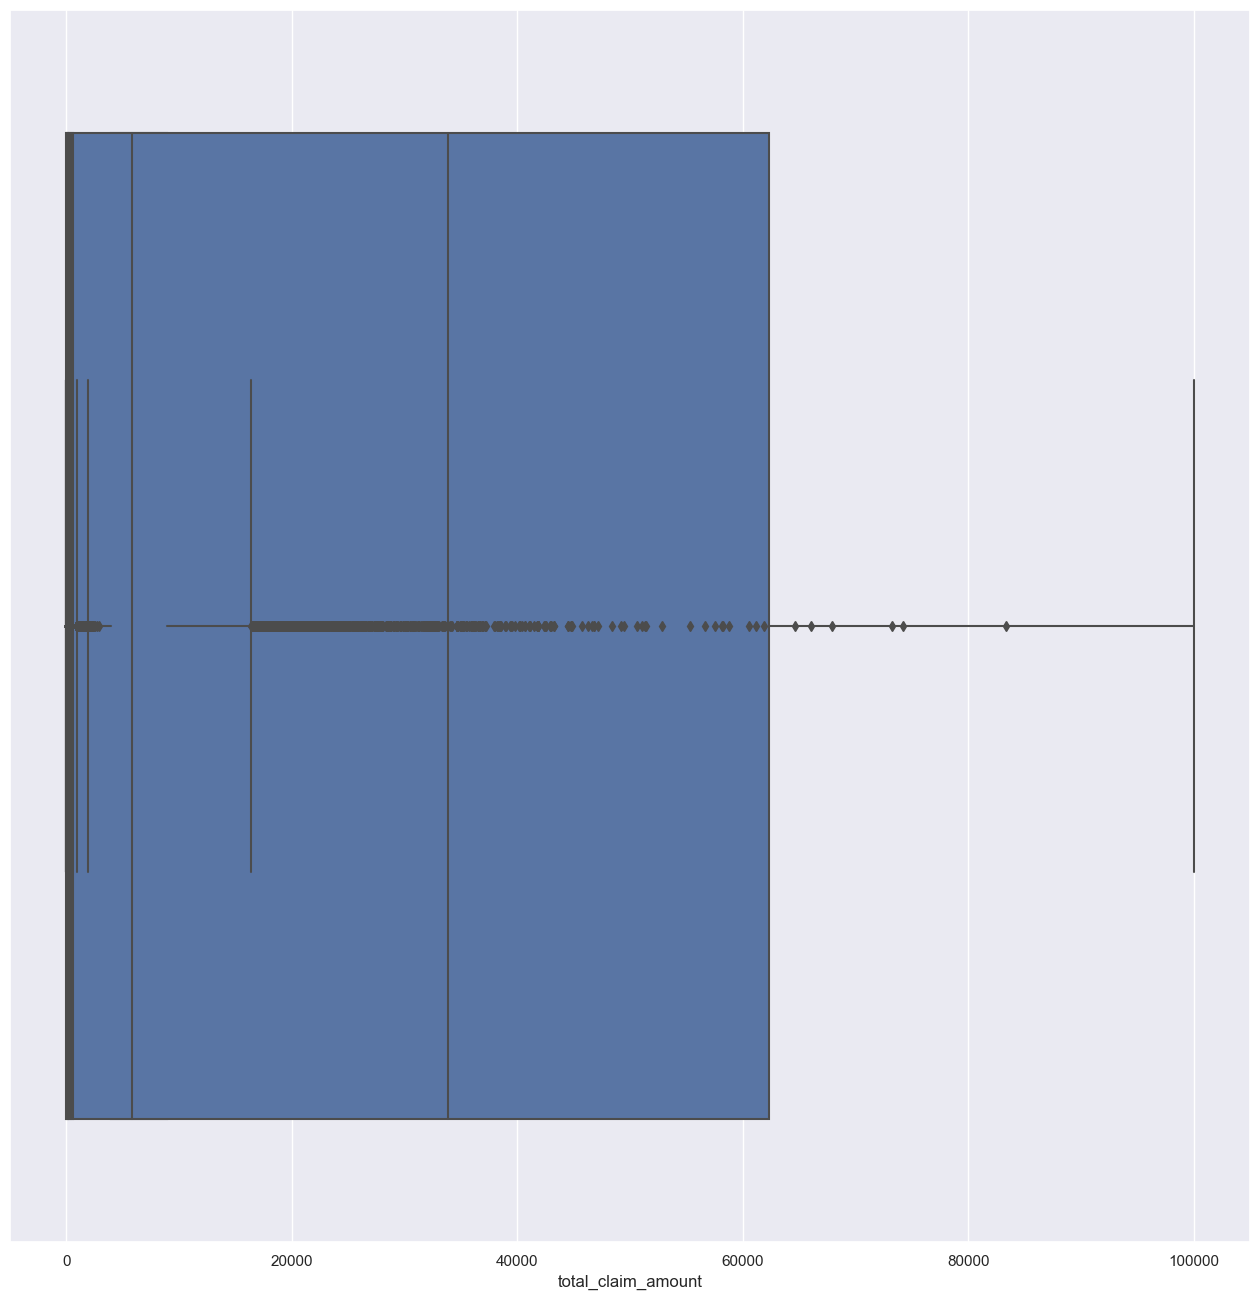

In [26]:
create_boxplot(continuous_df)

# Lab Cleaning Categorical Data

In [27]:
def create_countplots(df):
    for col in df.columns:
        if df[col].nunique() >= 6:
            sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        else:
            sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.tight_layout()
        plt.show()

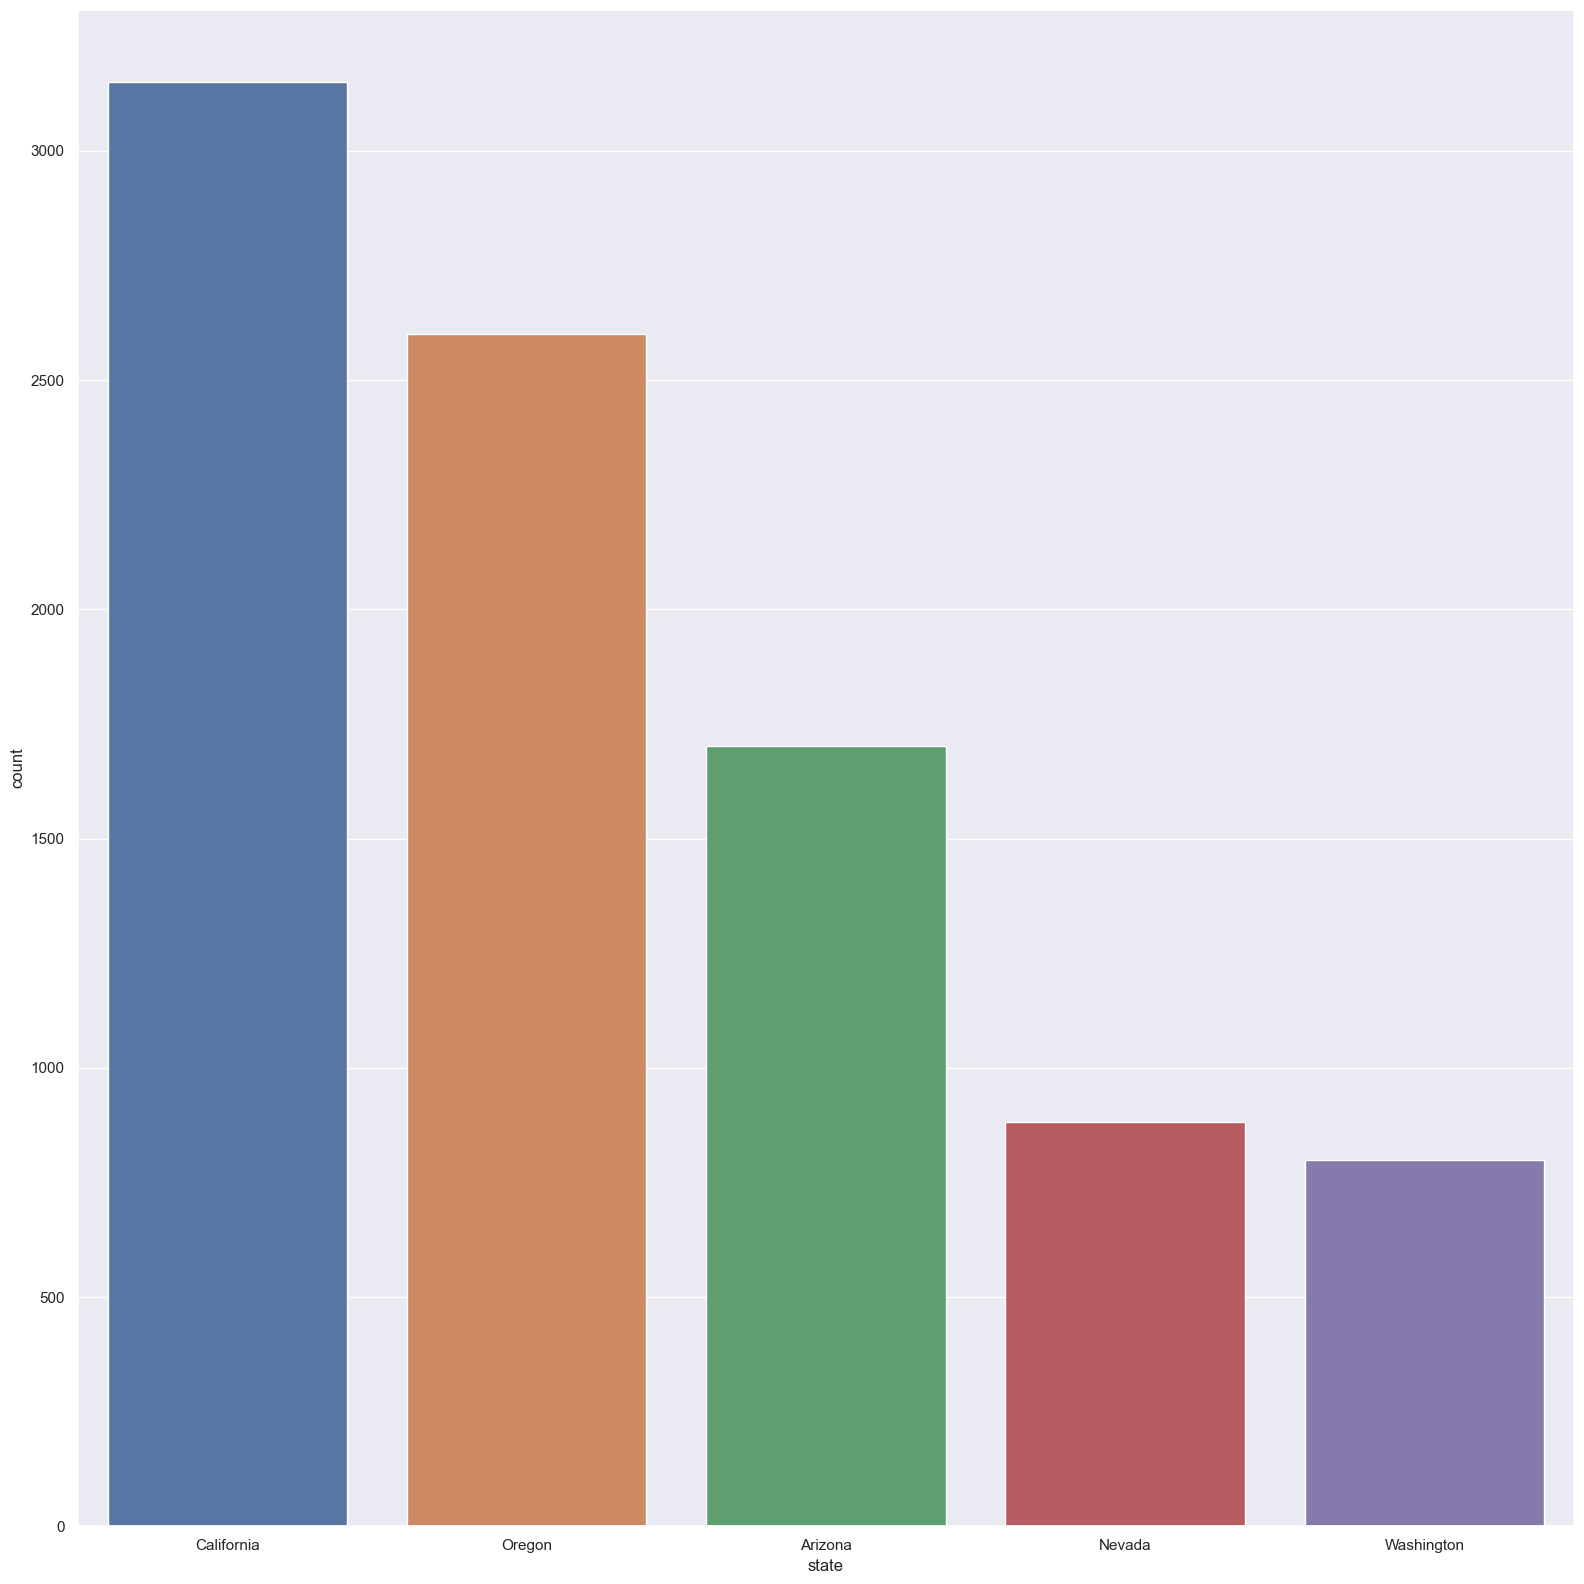

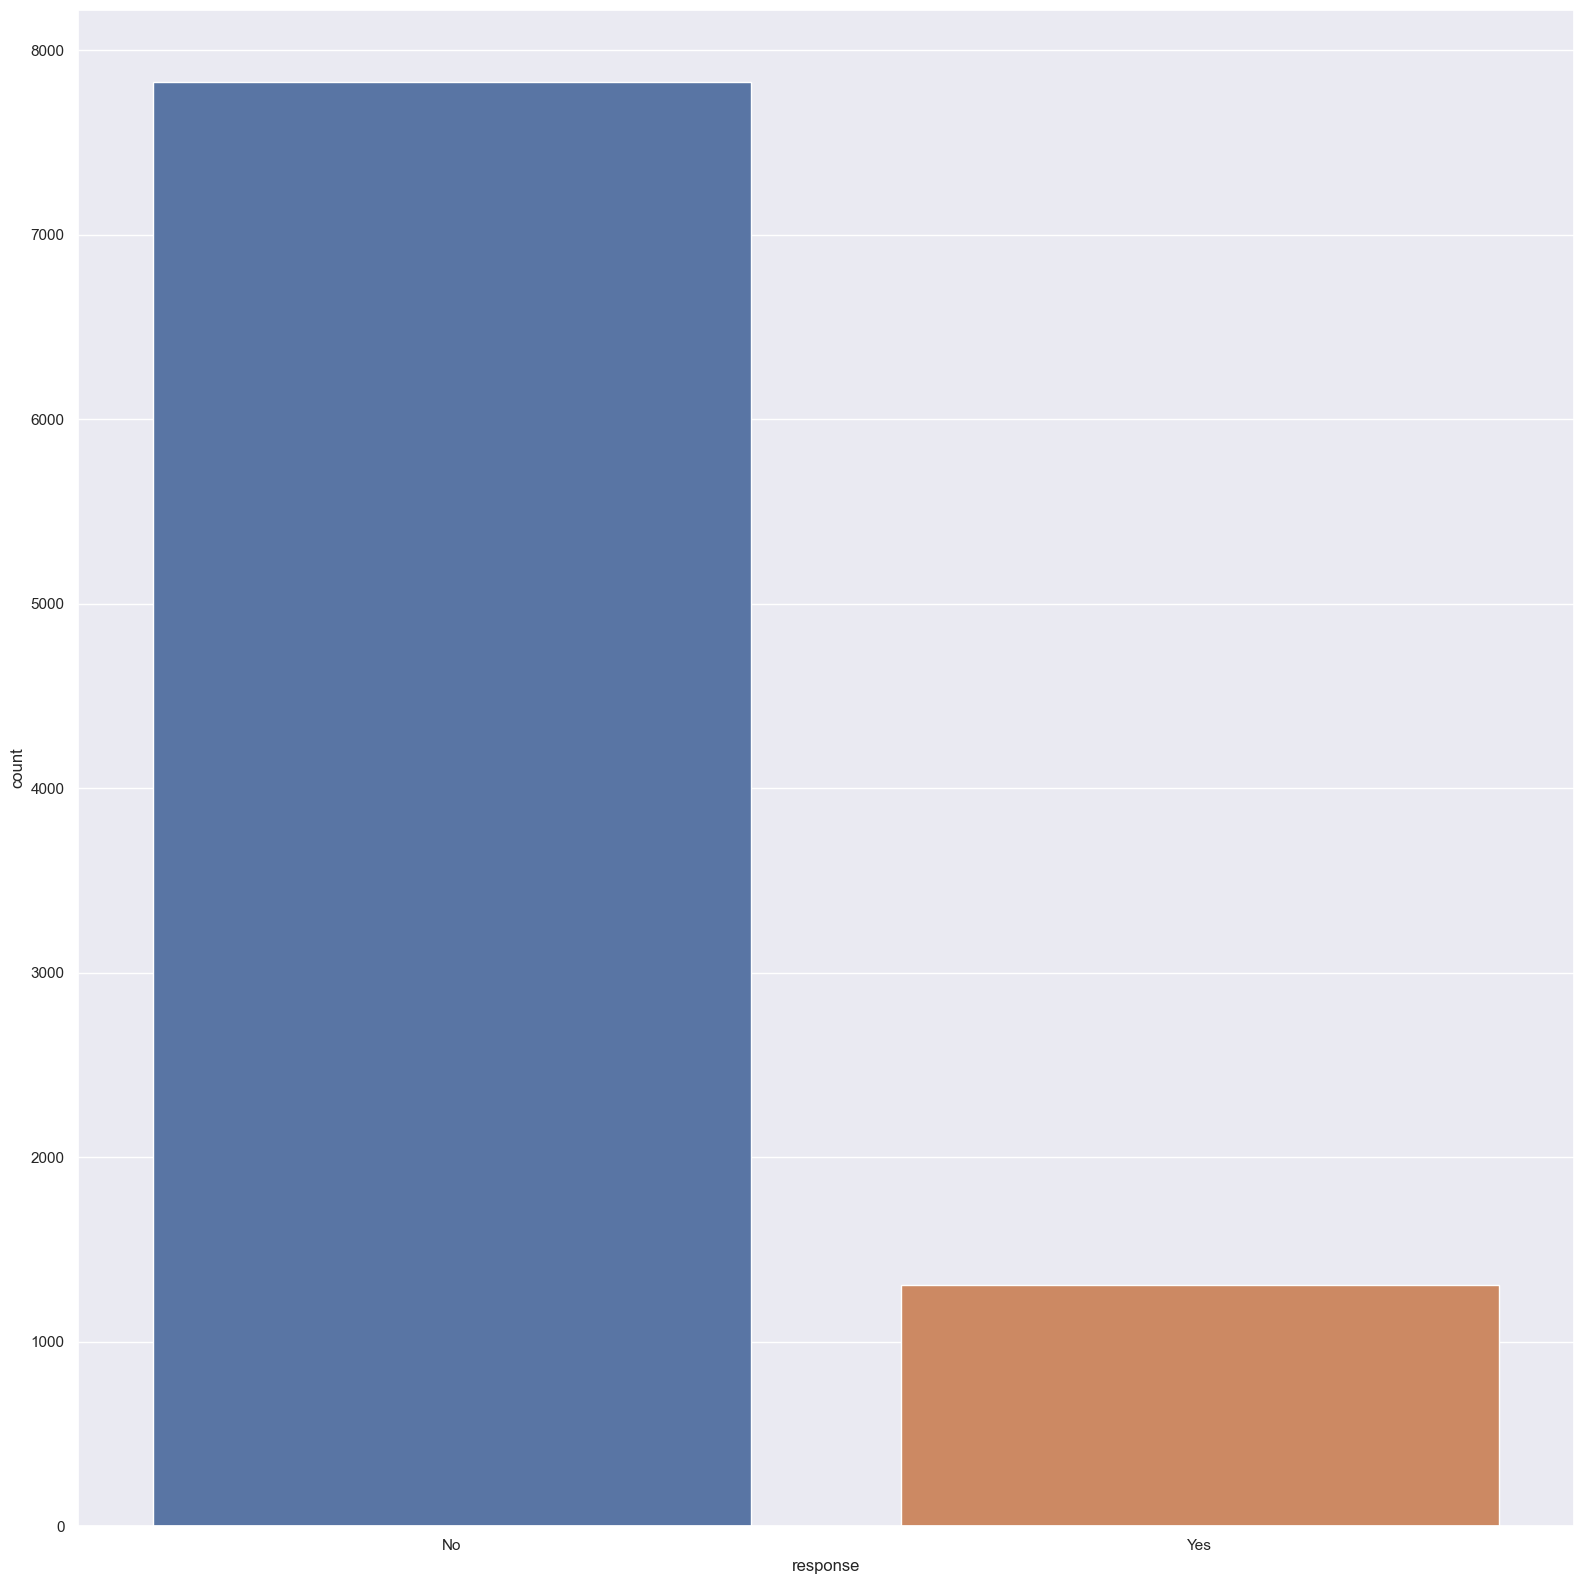

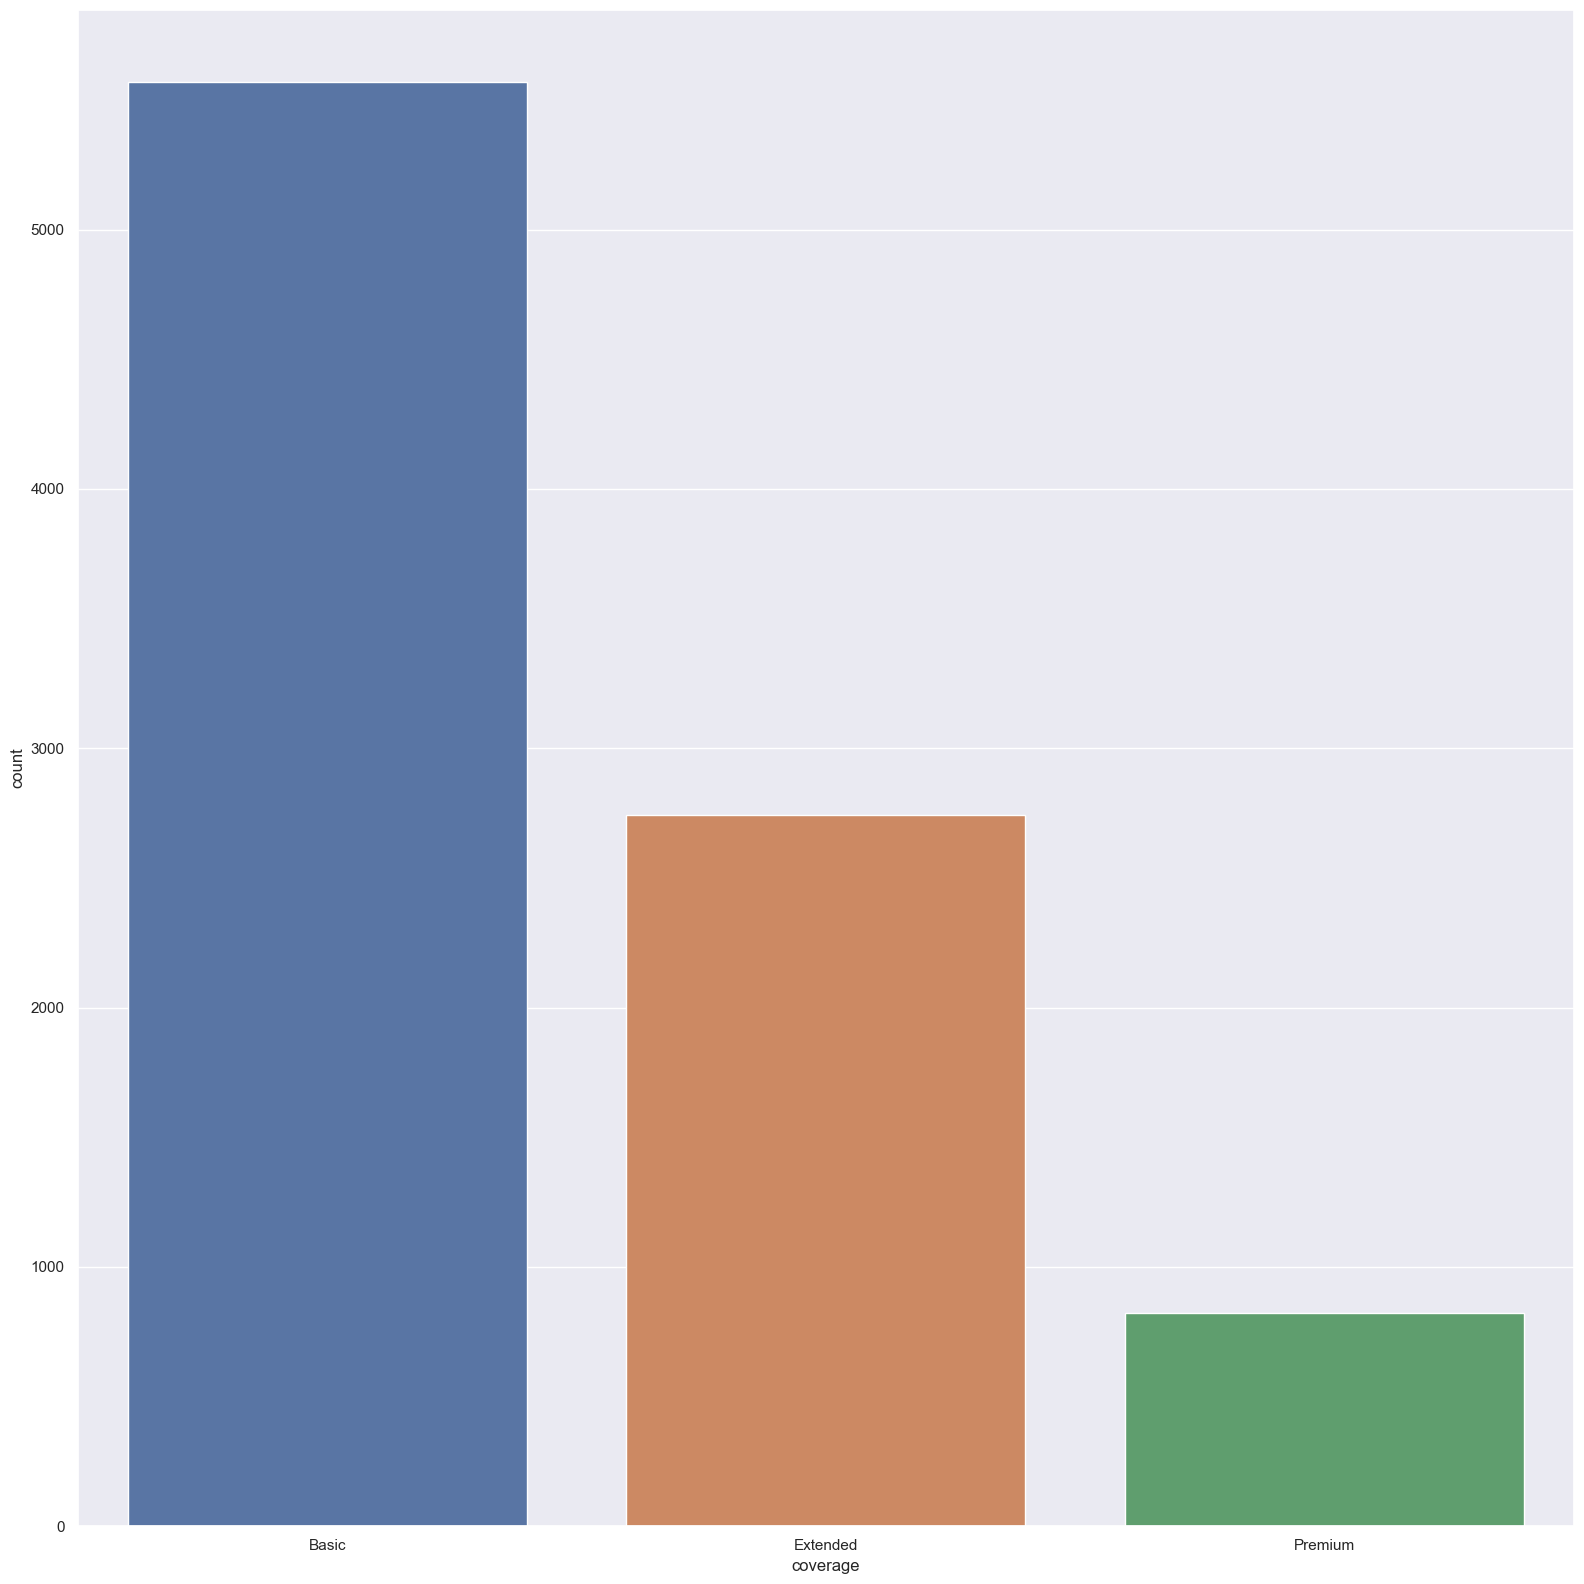

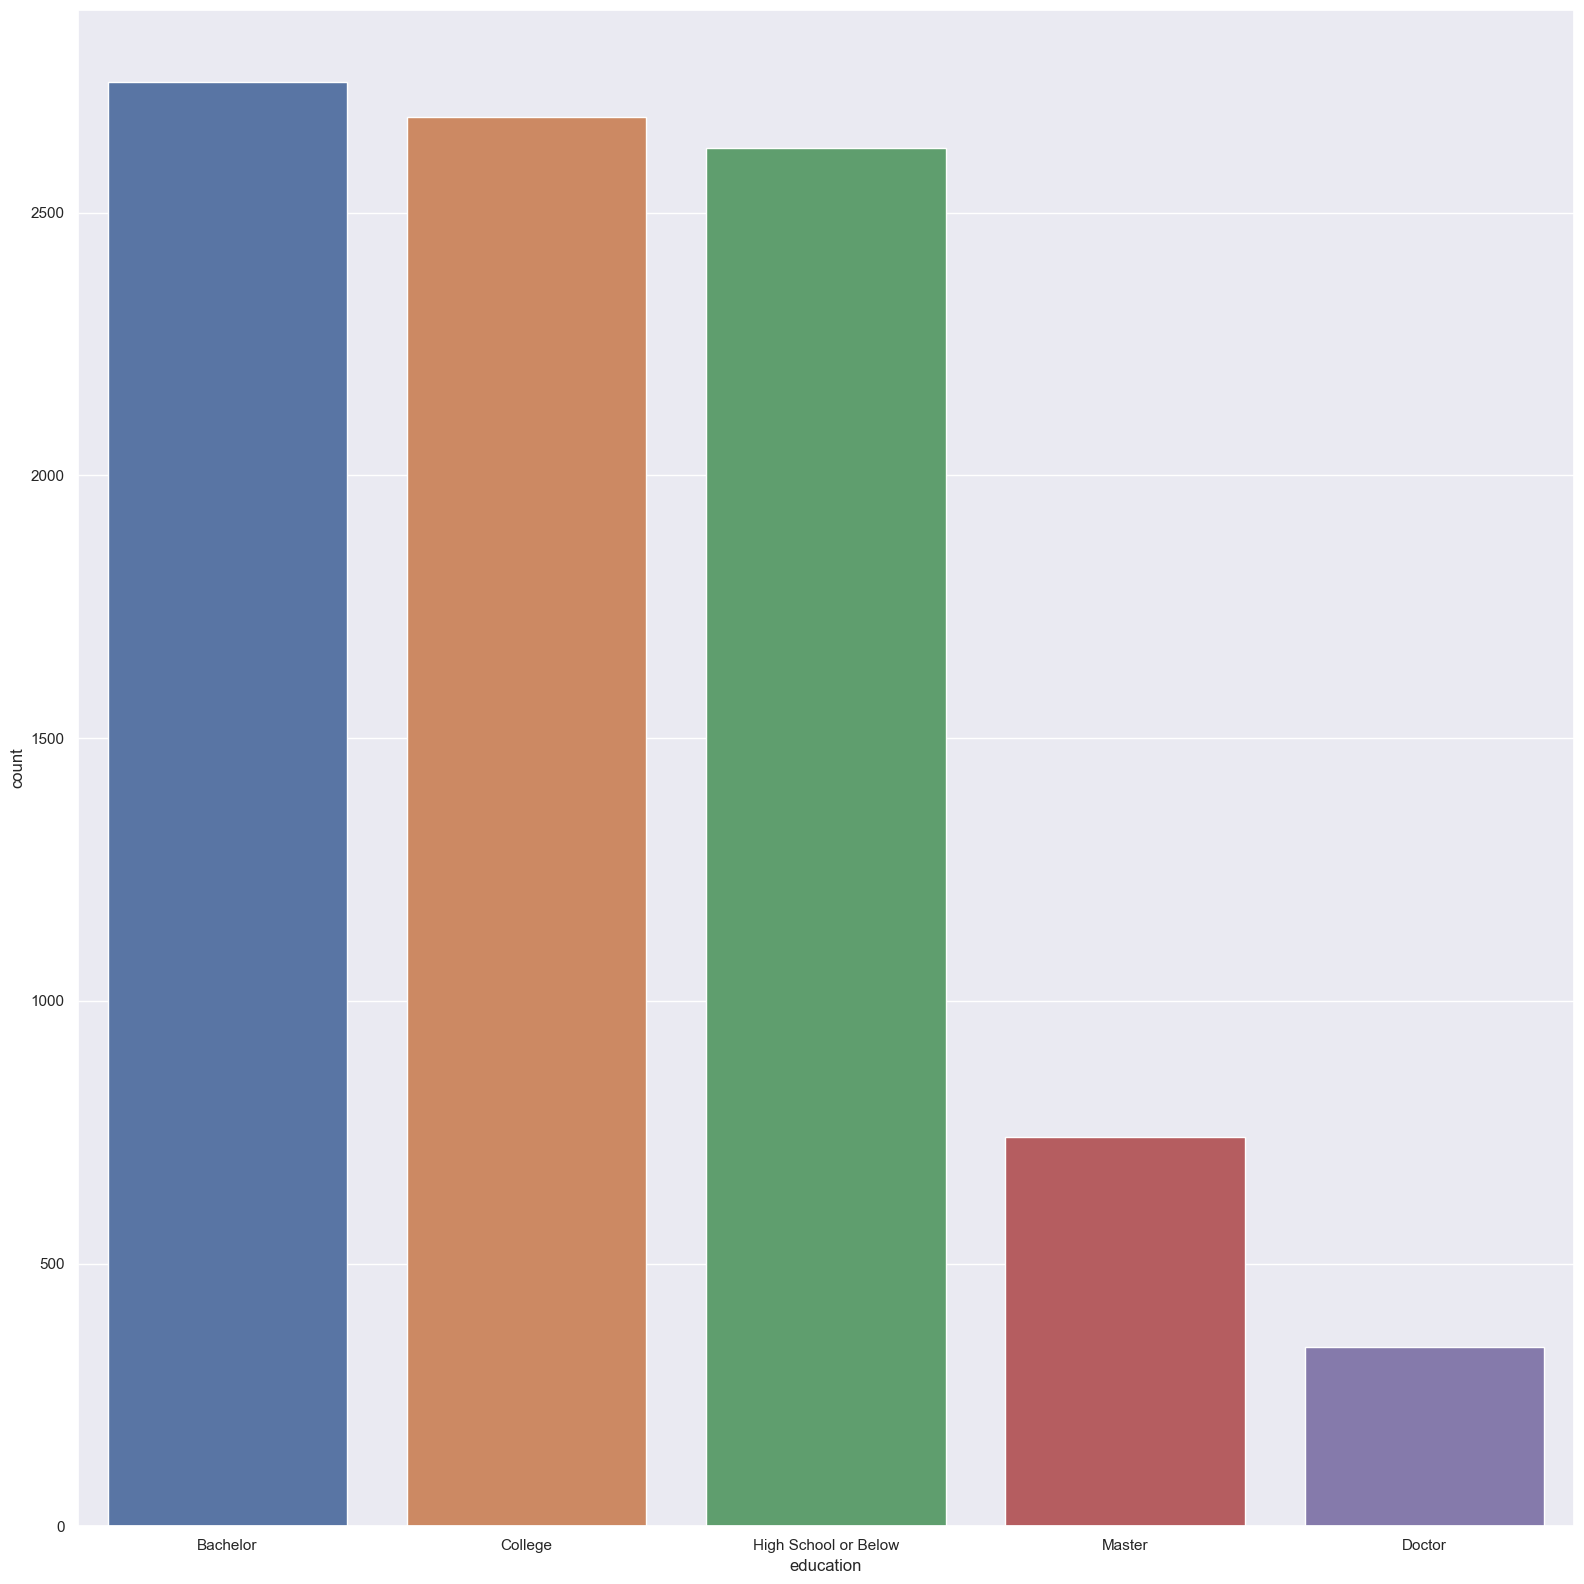

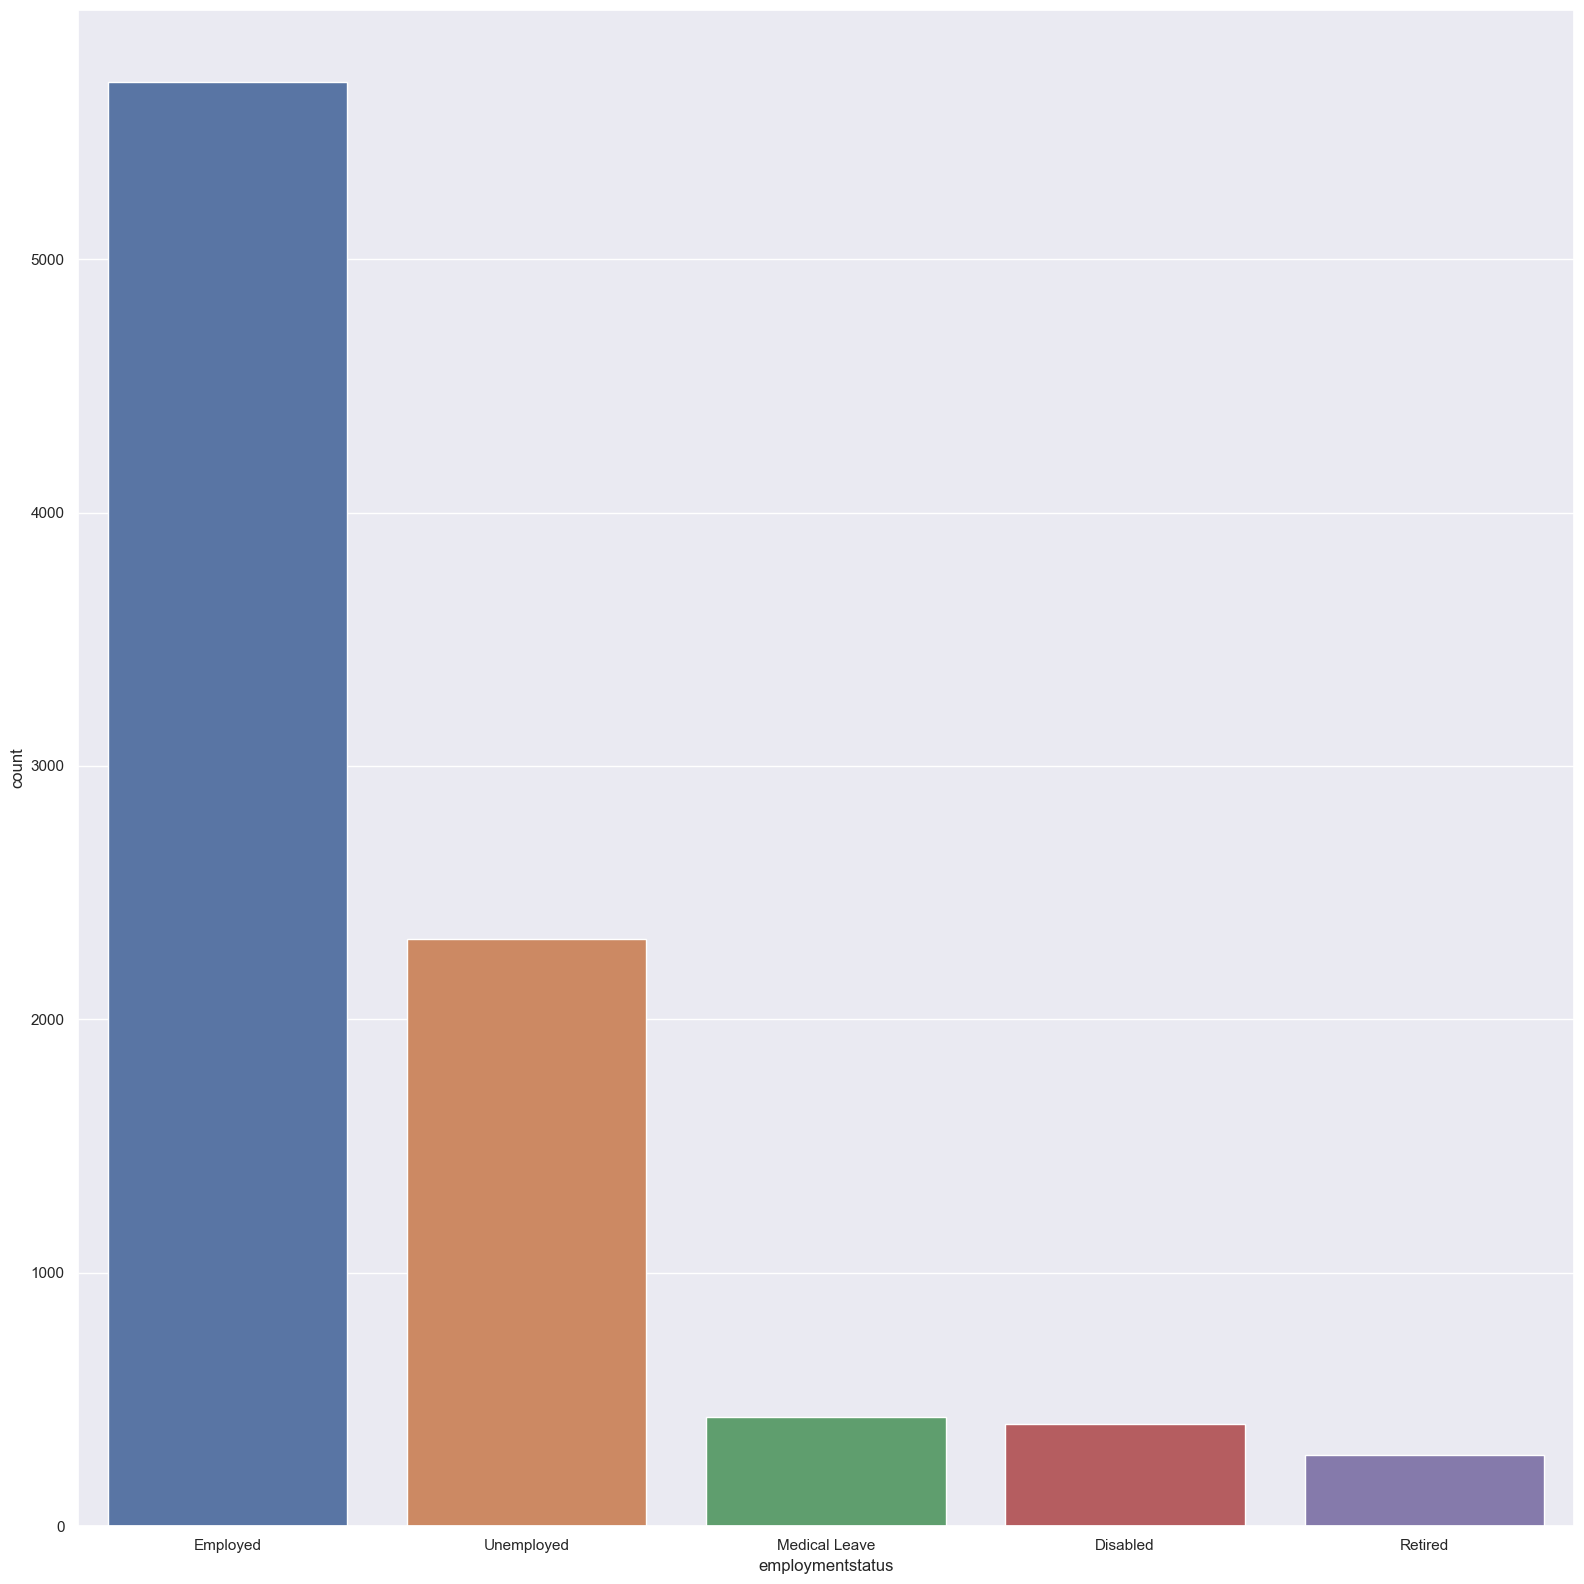

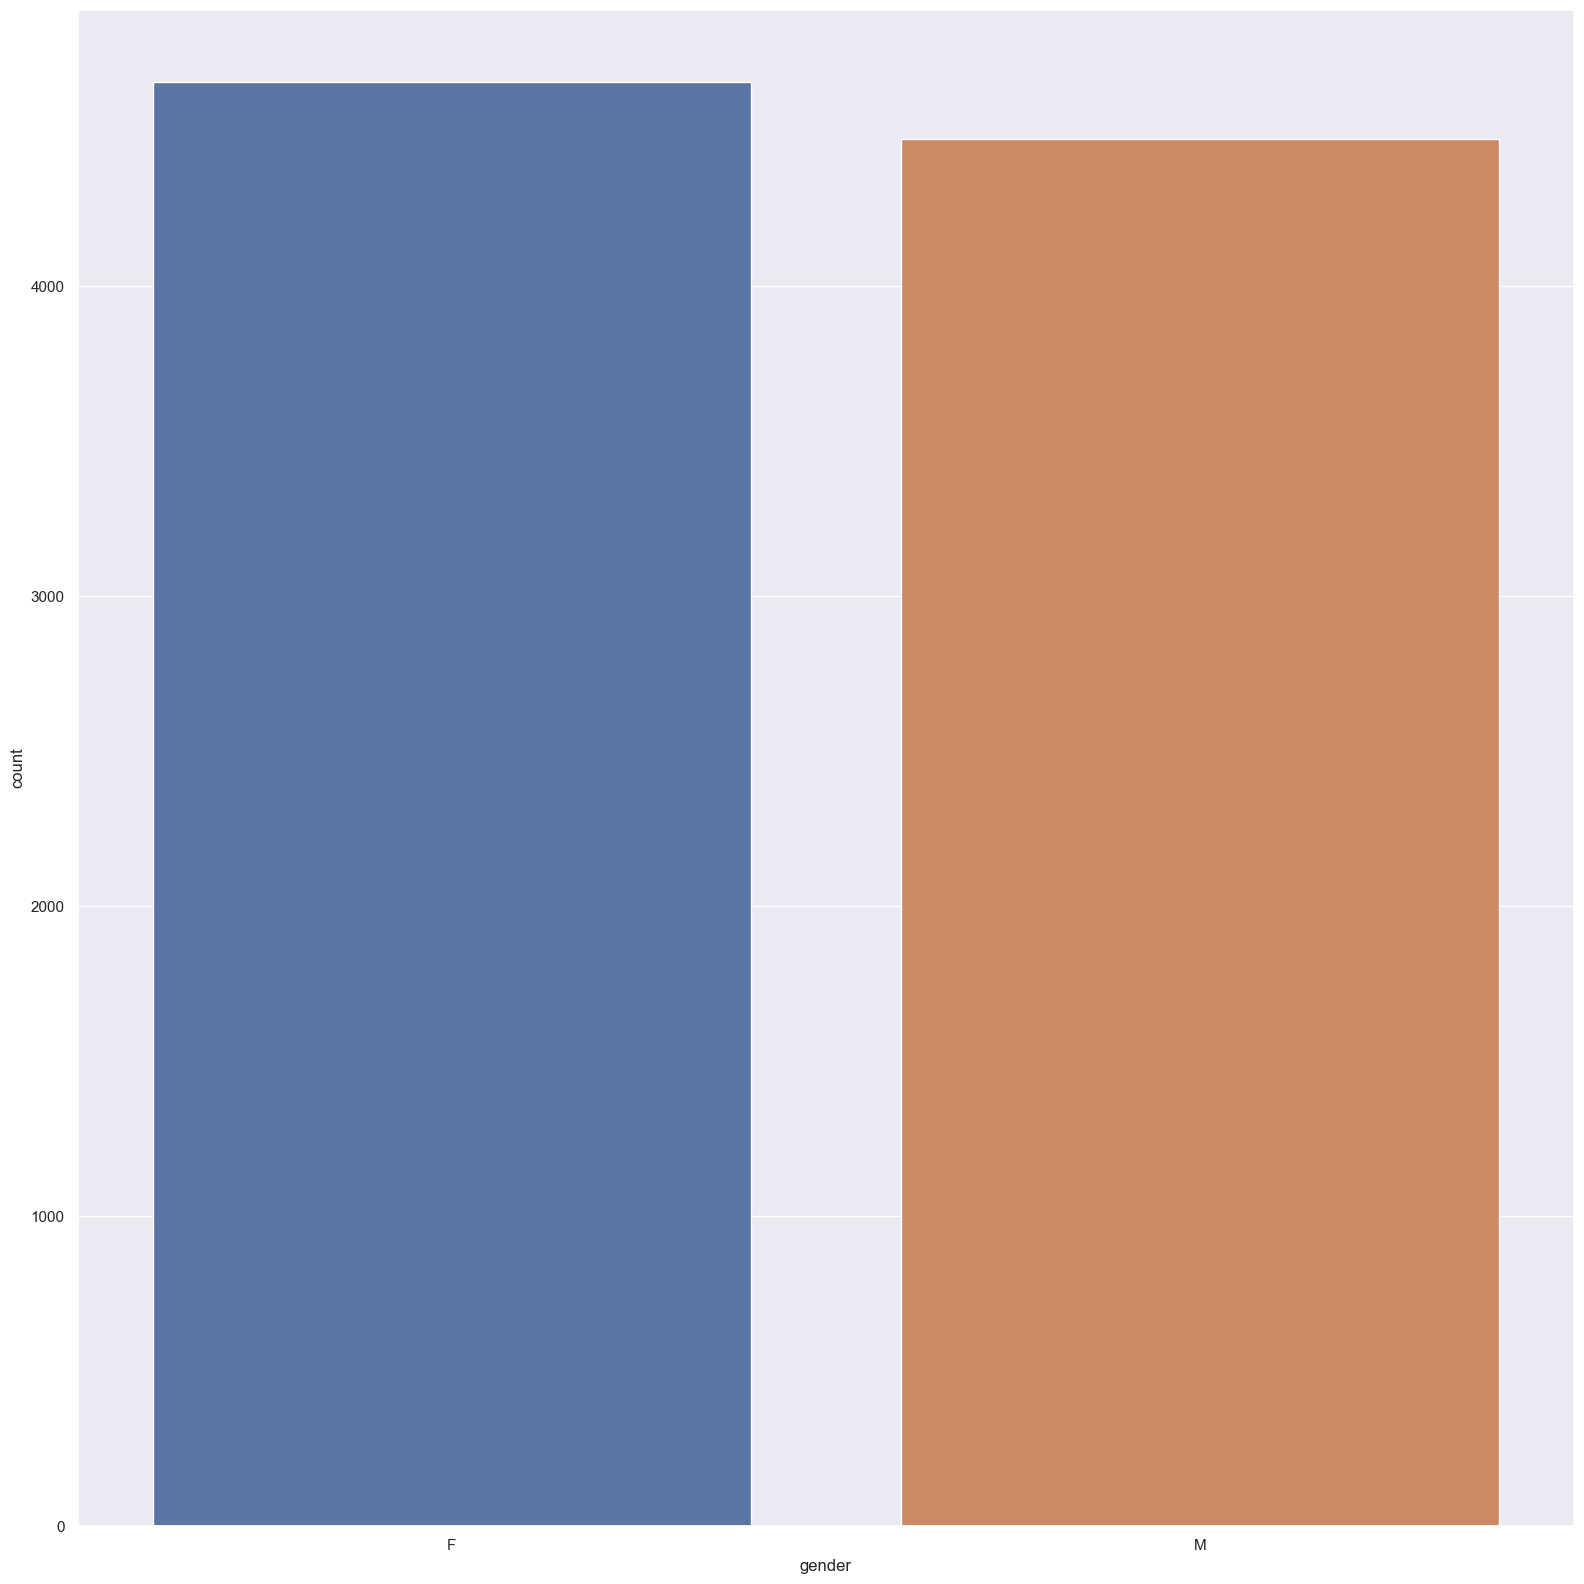

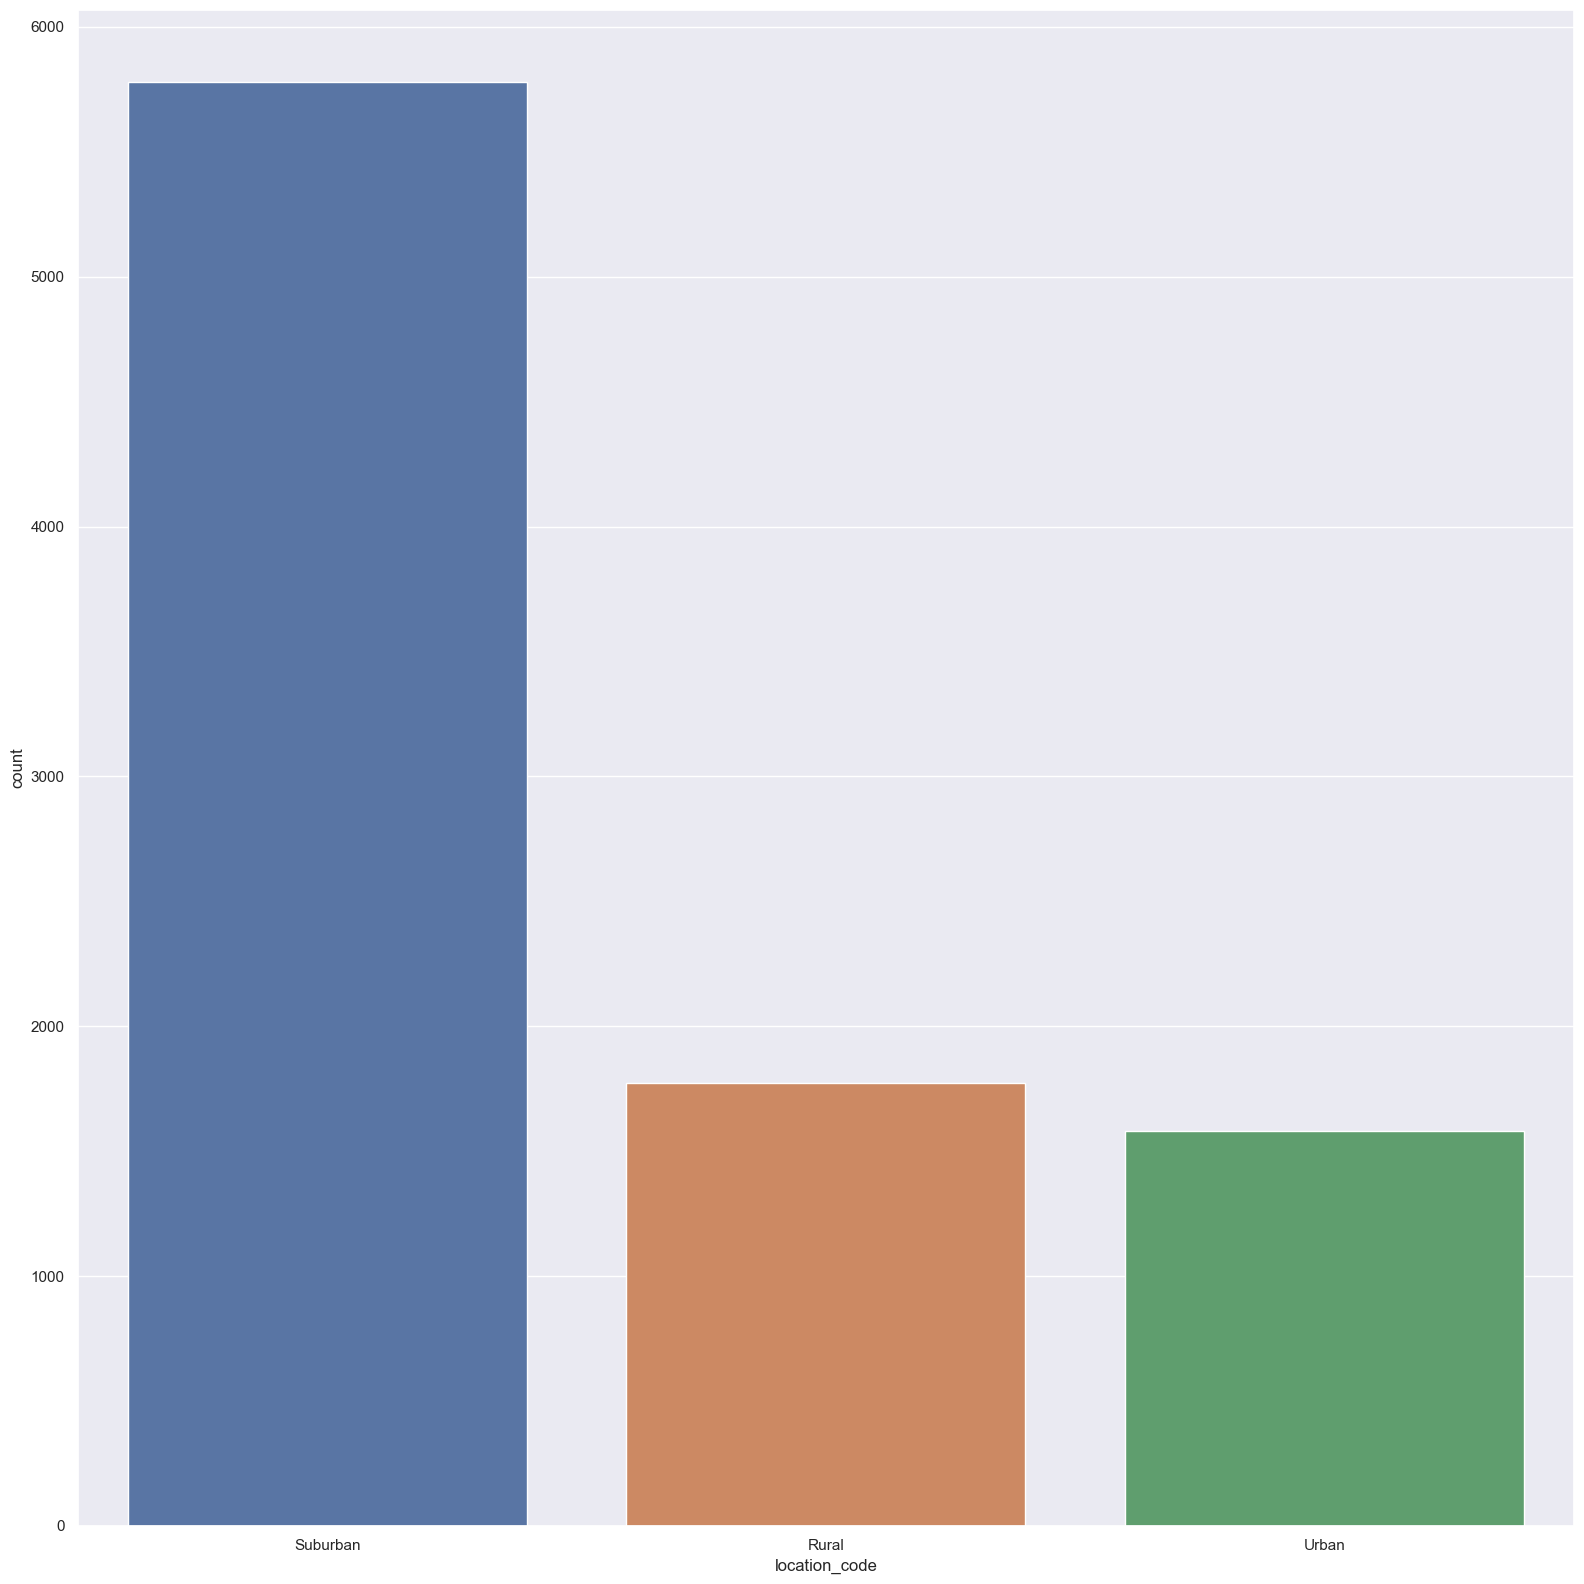

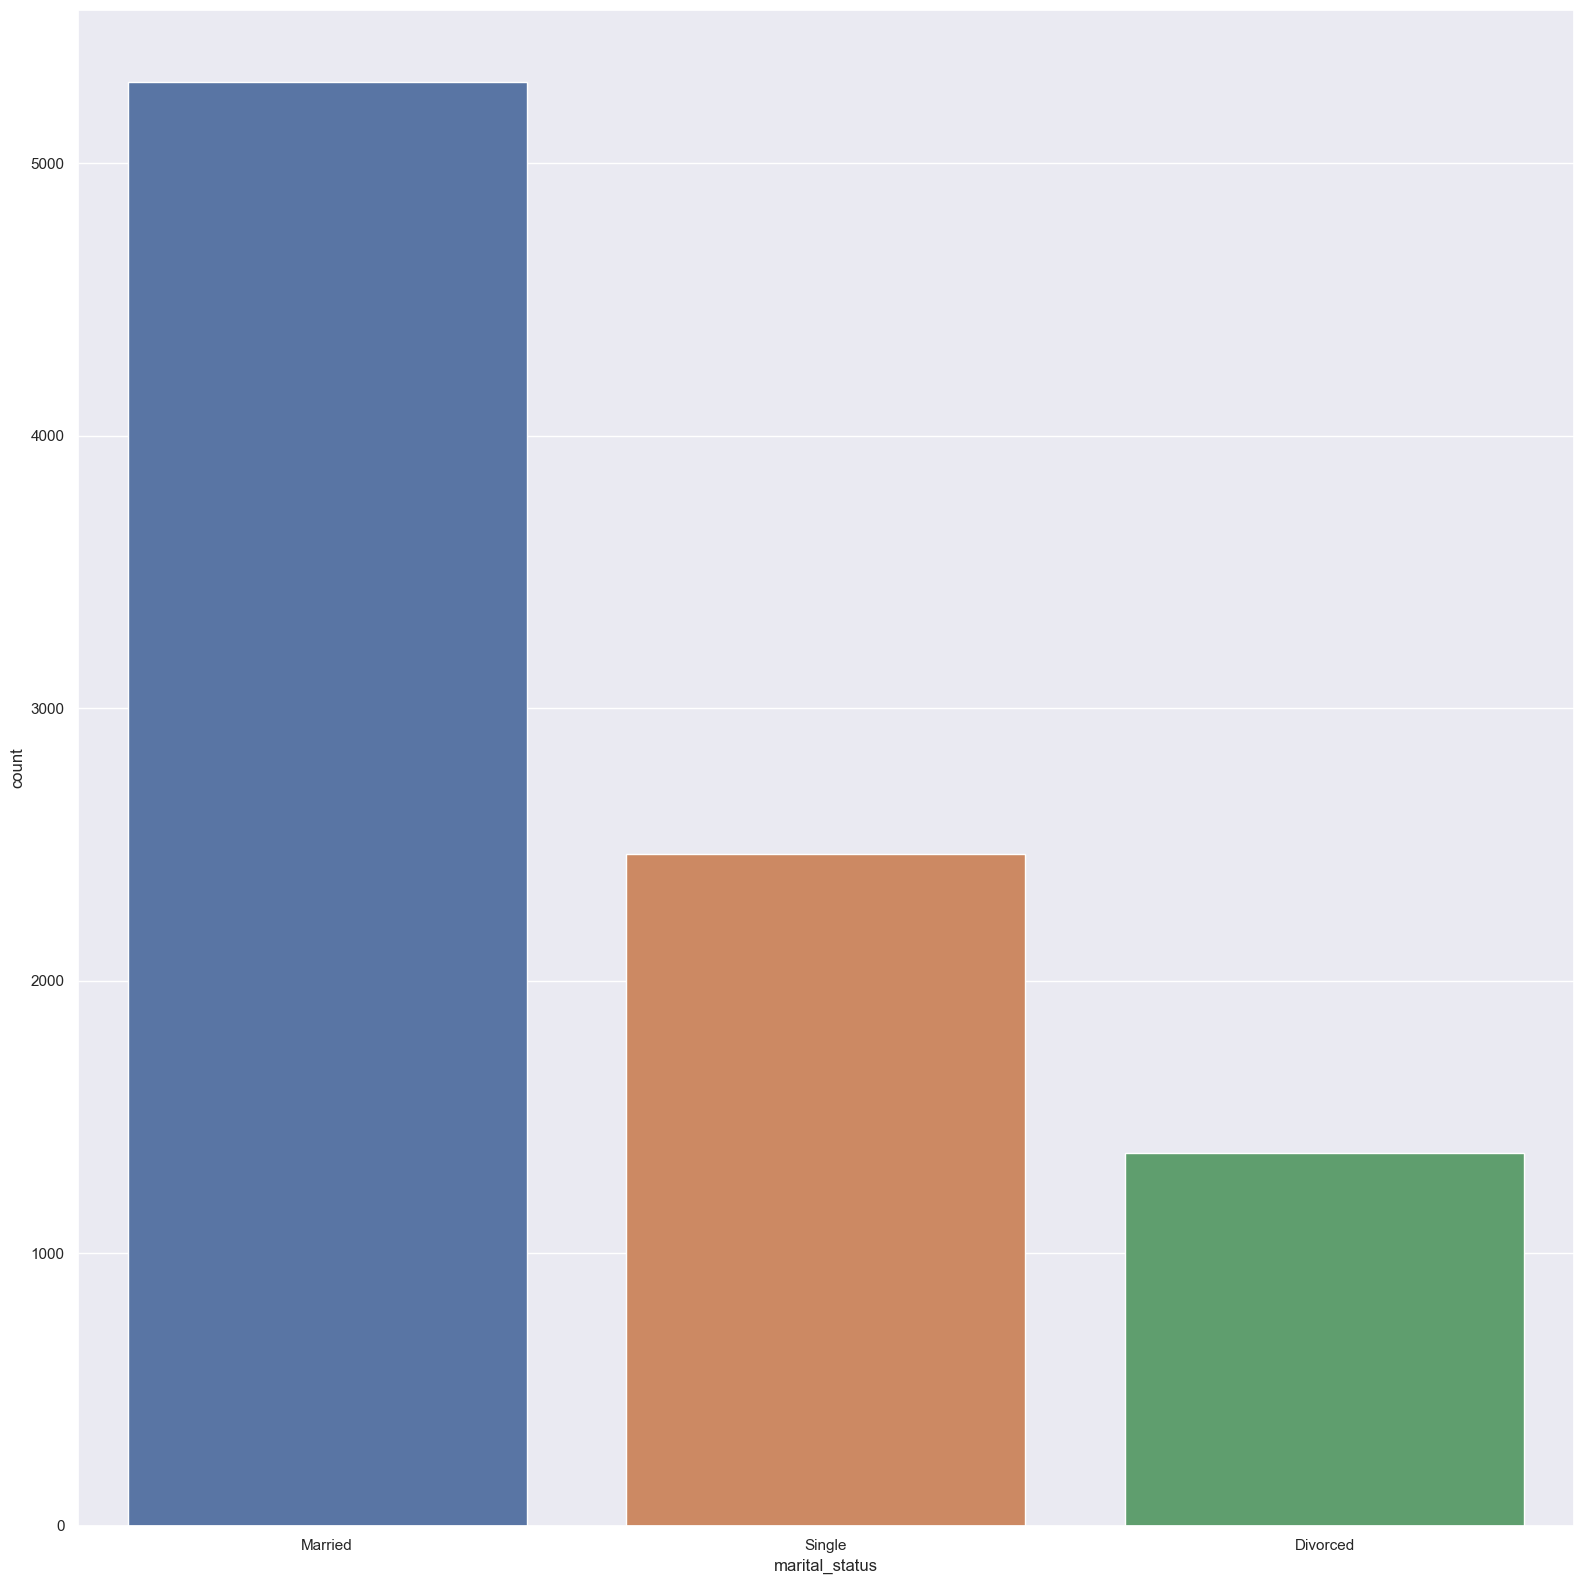

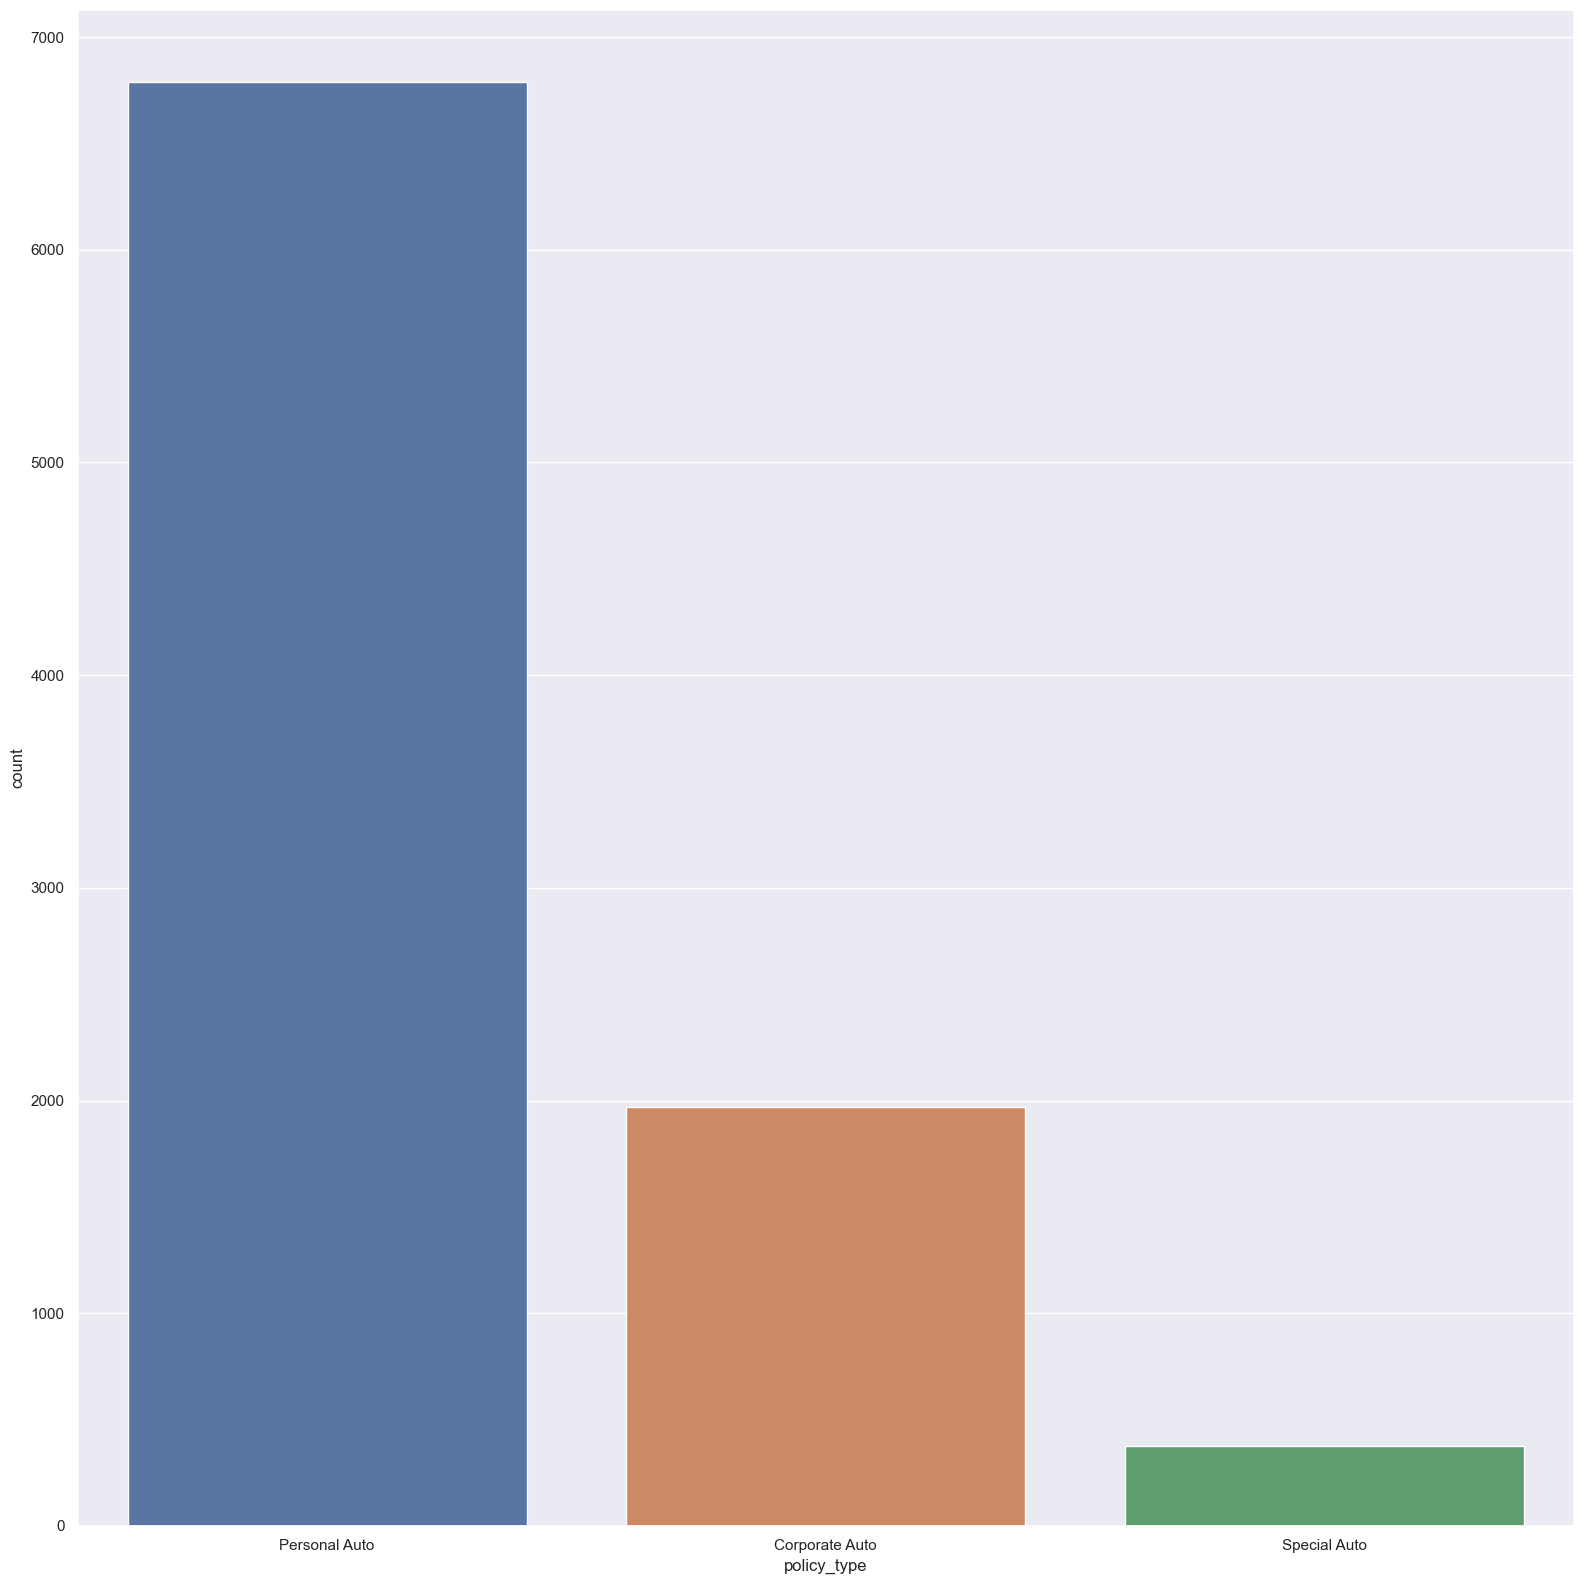

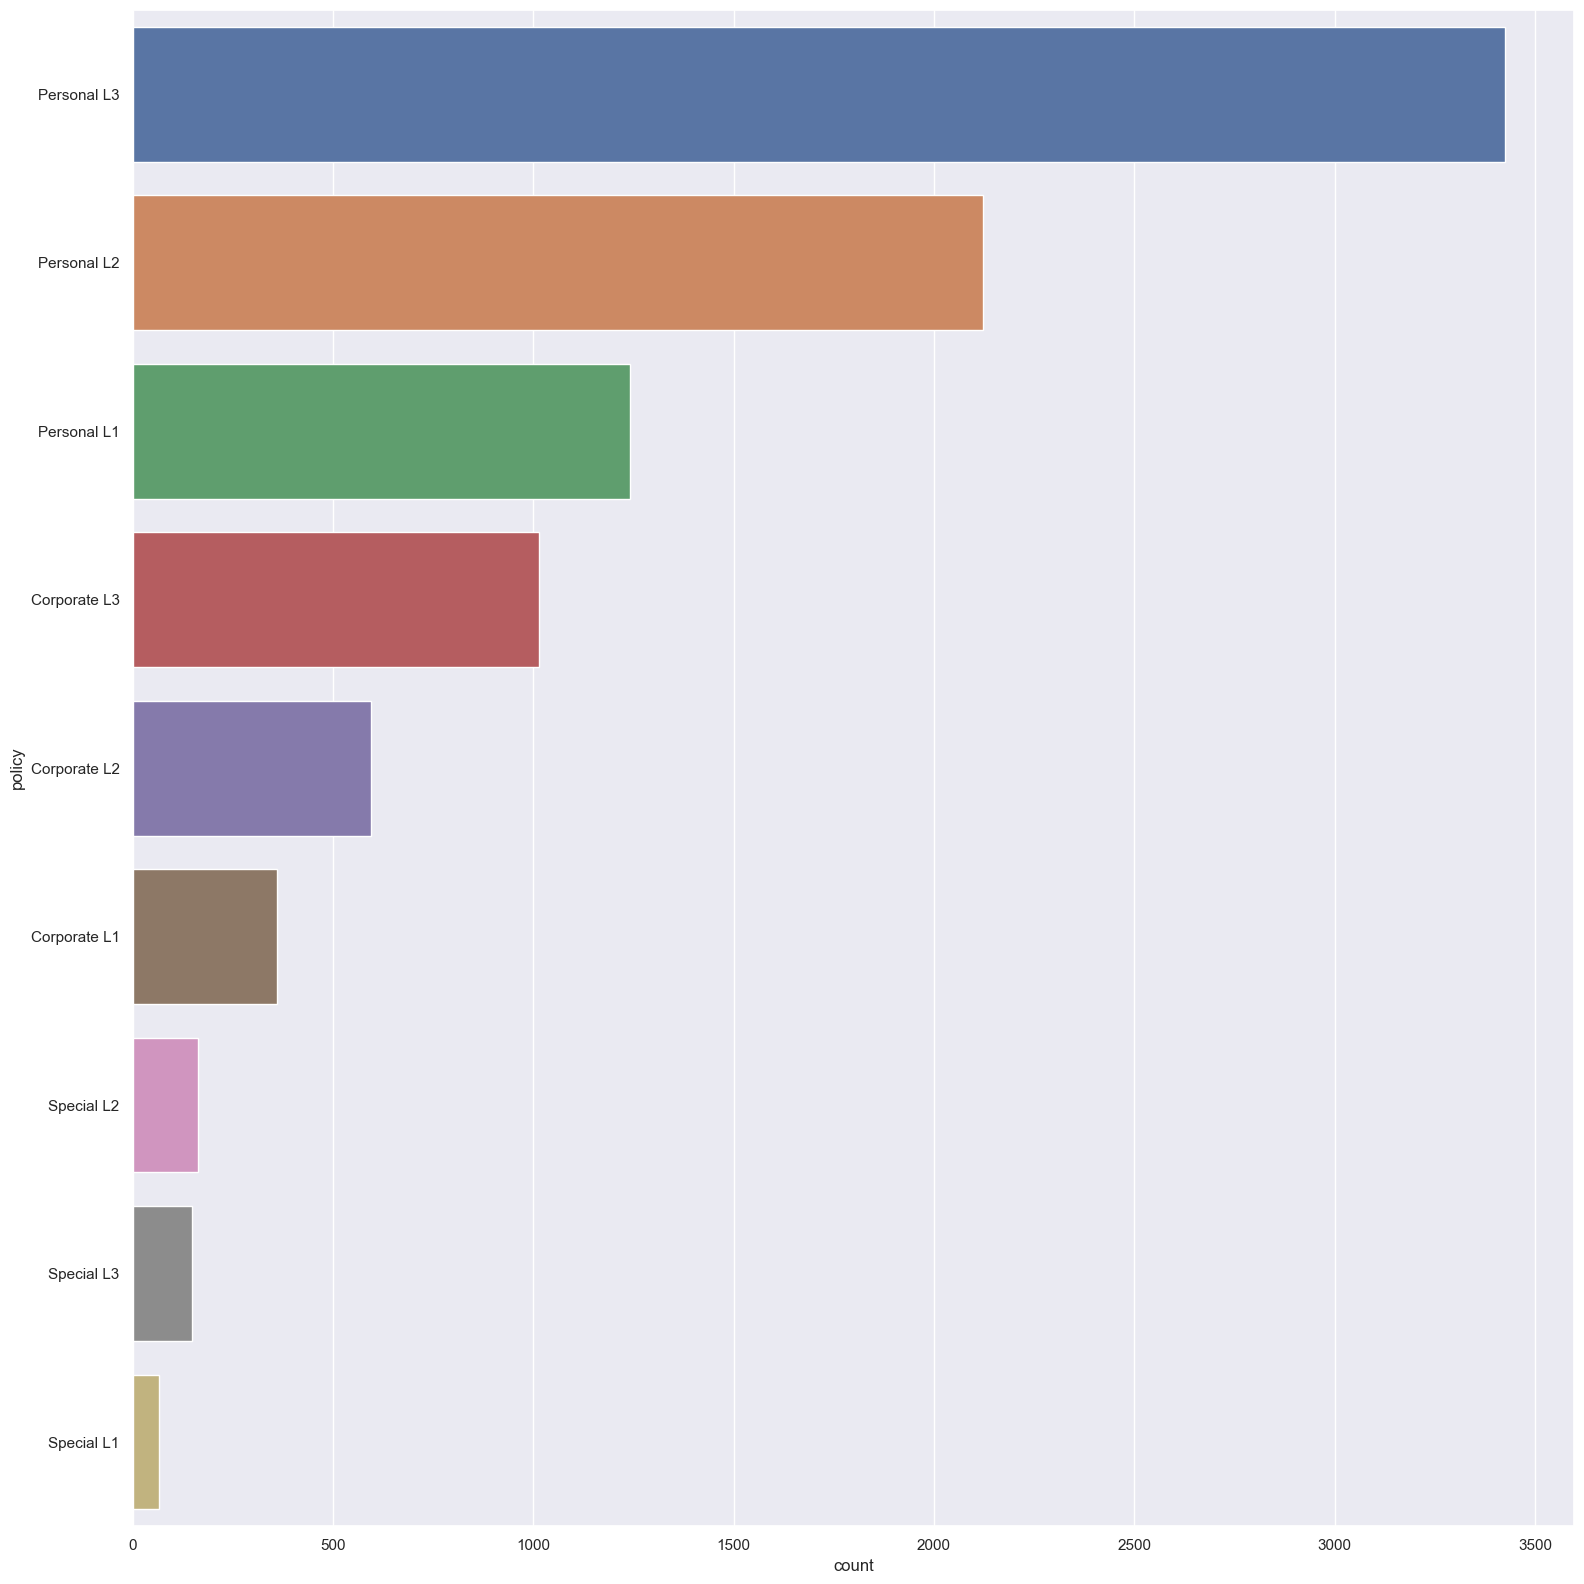

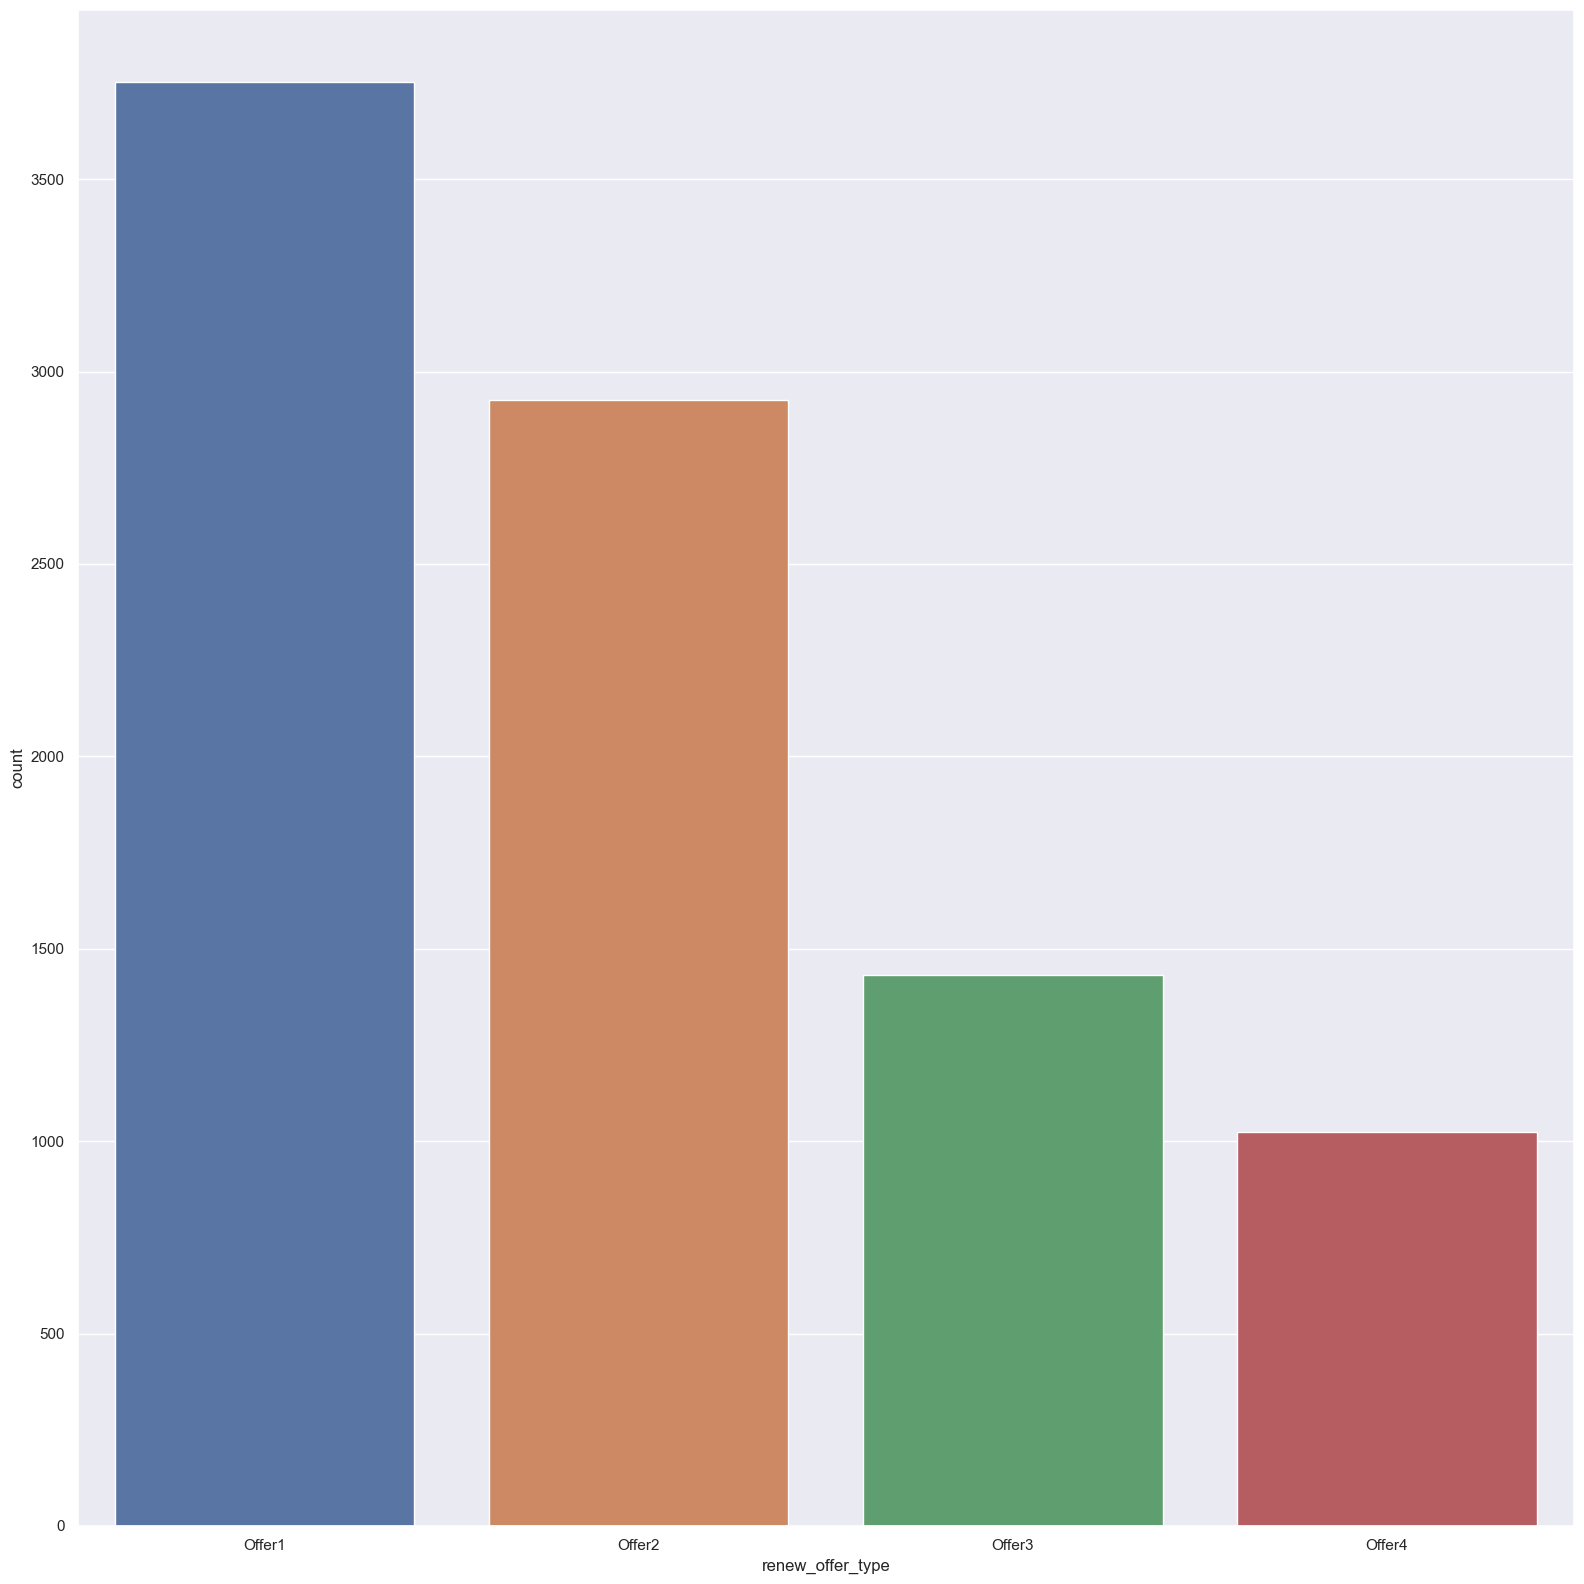

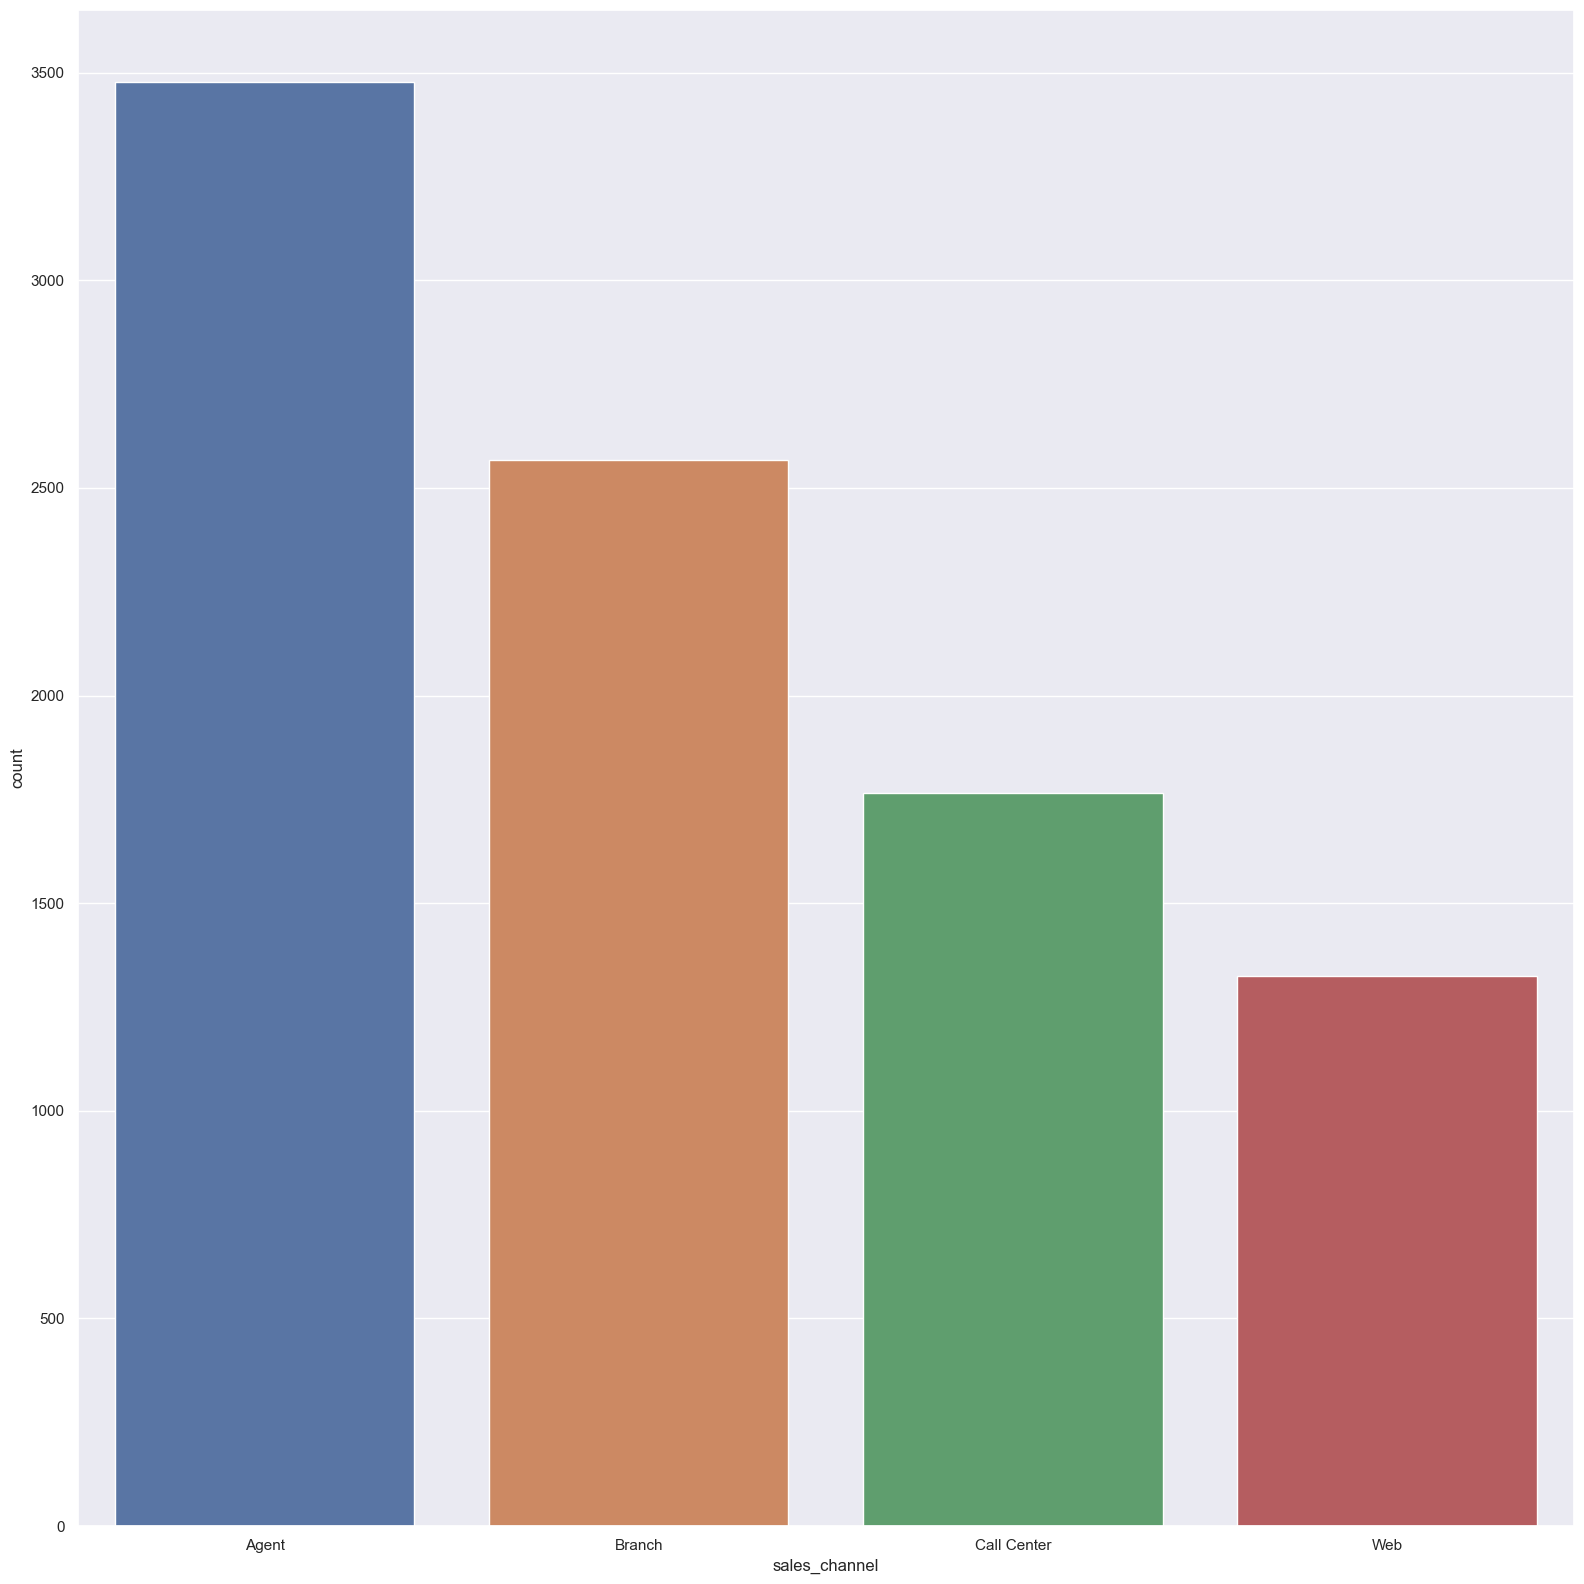

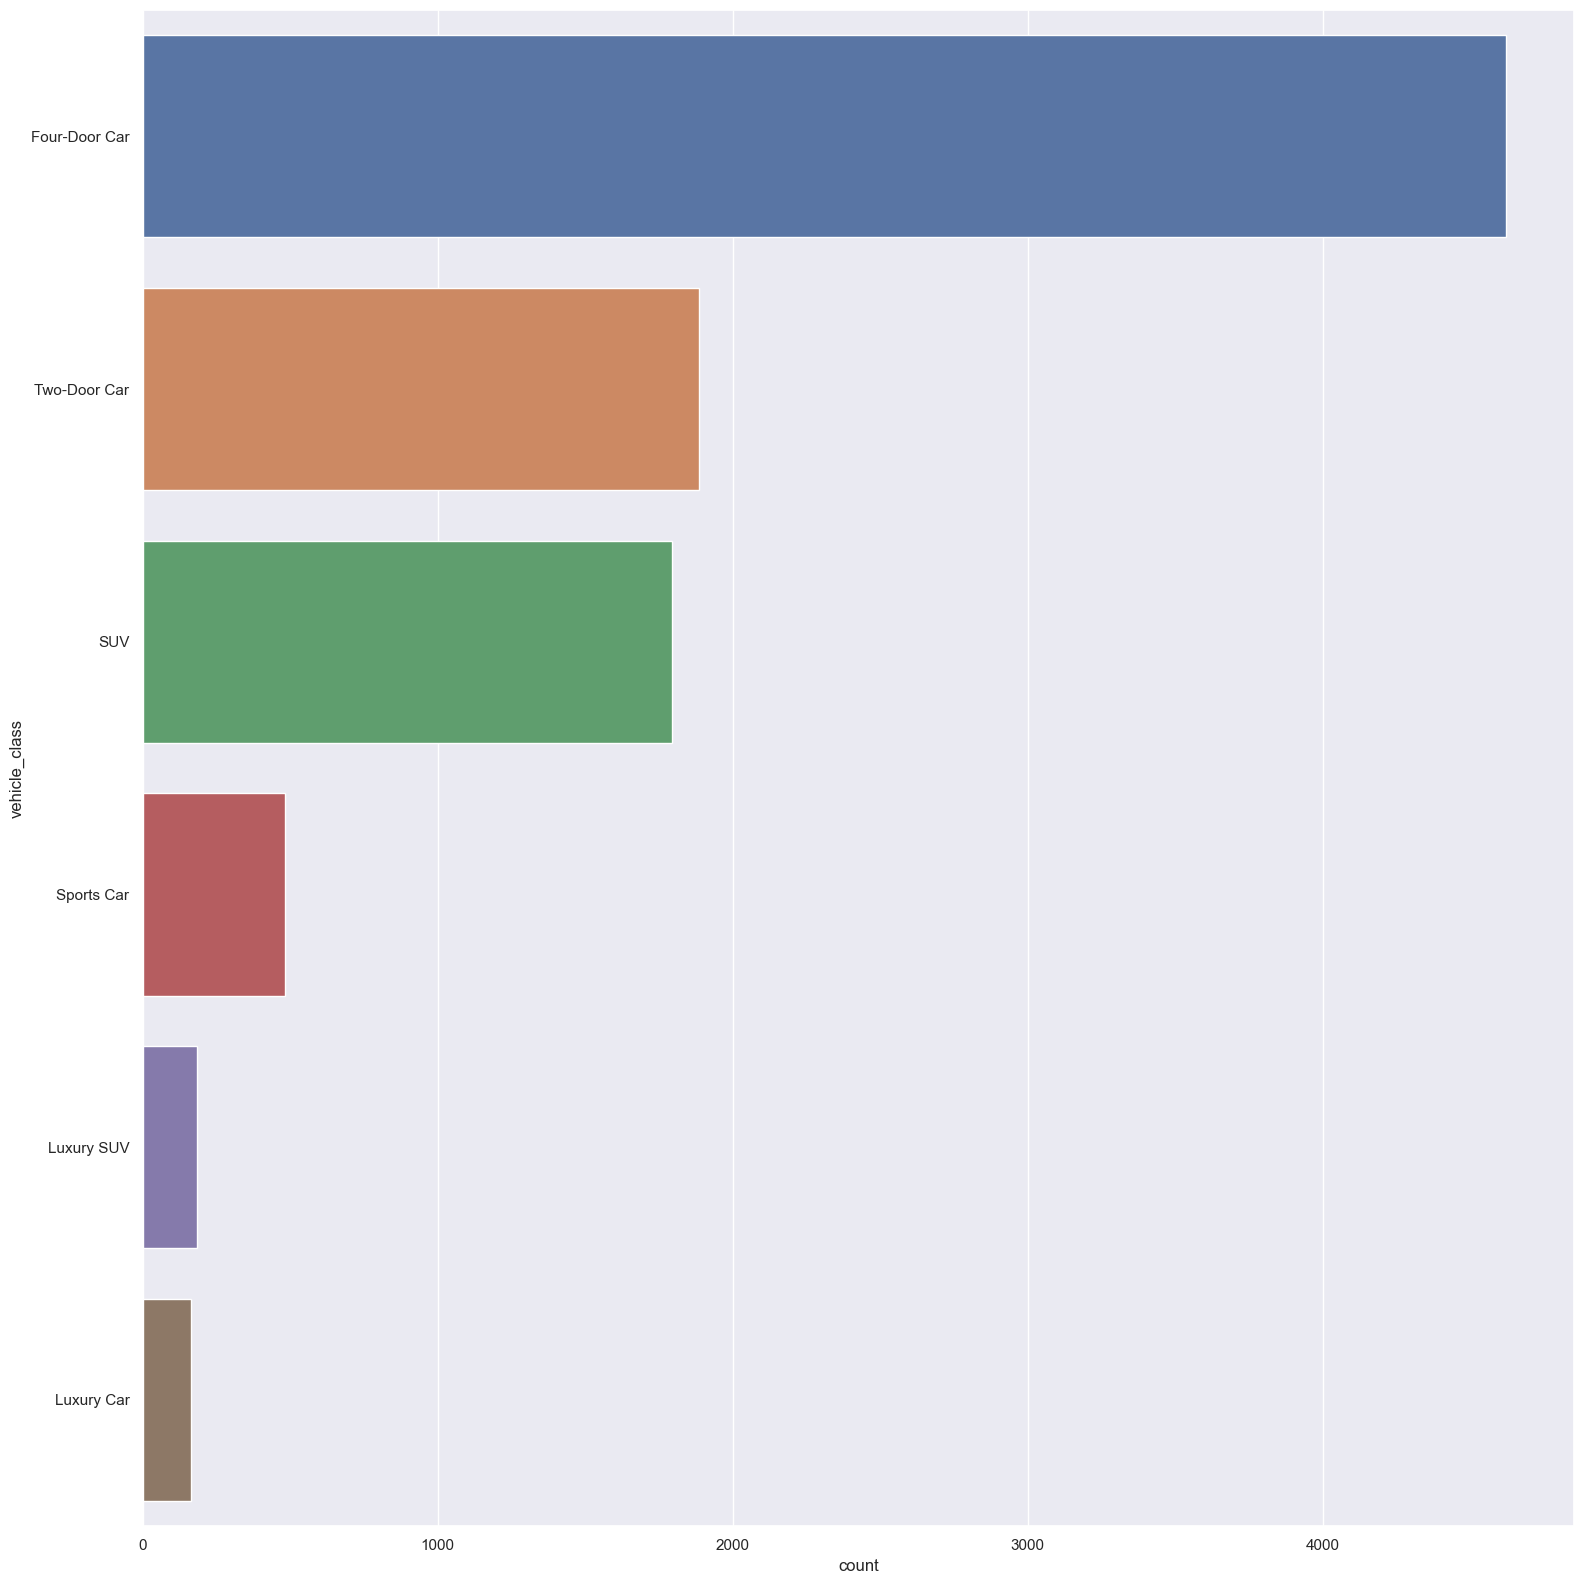

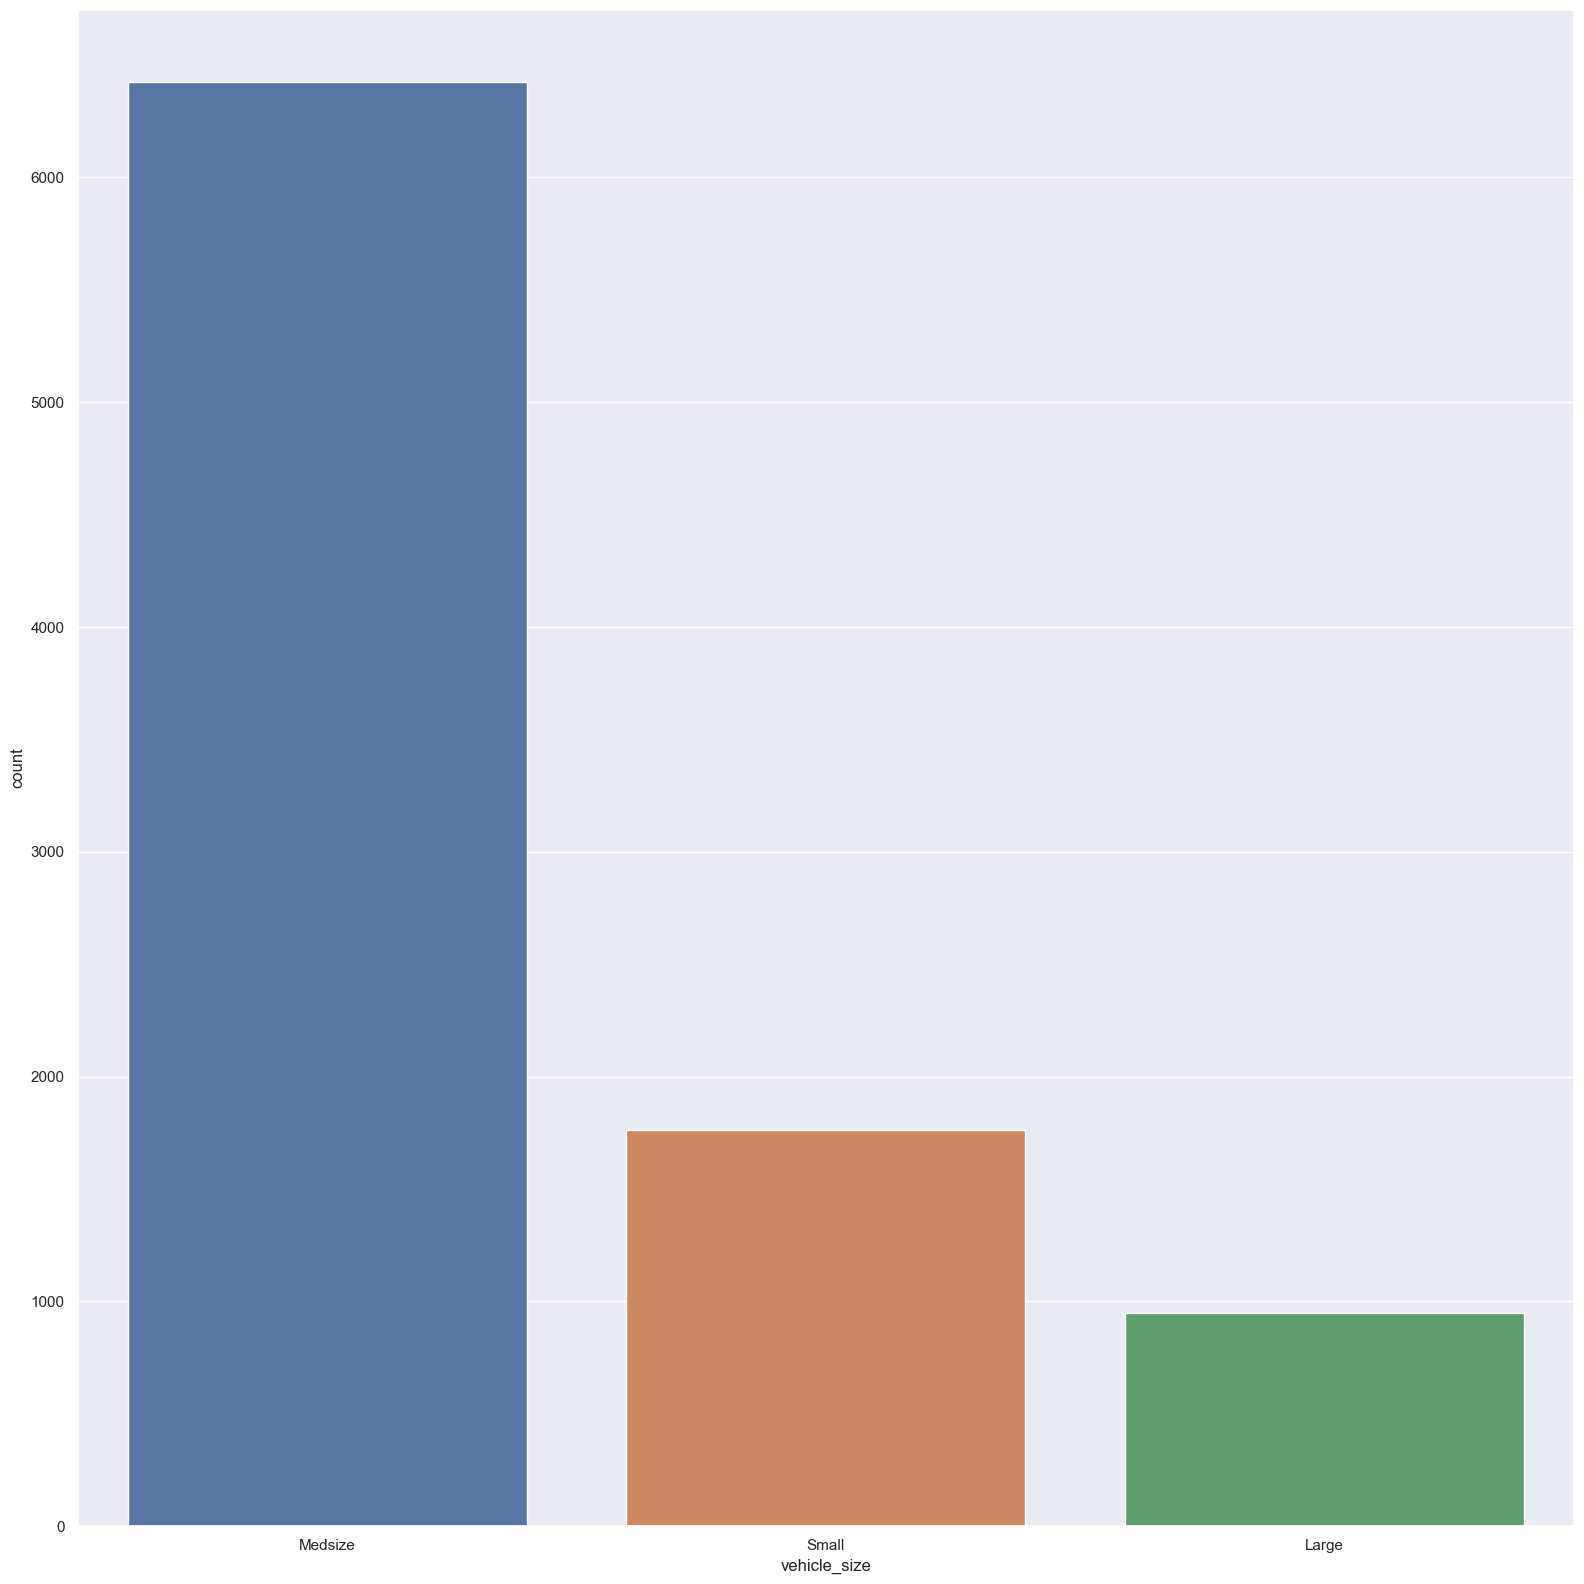

In [28]:
create_countplots(categorical_df)

In [29]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [30]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [31]:
def transform_policy_column(df):
    df = df.drop(columns=['policy_type'])
    df['policy'] = df['policy'].apply(lambda x: x.split(' ')[1])
    return df


categorical_df = transform_policy_column(categorical_df)

In [32]:
categorical_df['policy'].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

In [33]:
categorical_df.columns
categorical_df.isna().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [34]:
numerical_df.columns
numerical_df.isna().sum()

customer_lifetime_value          0
effective_to_date                0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

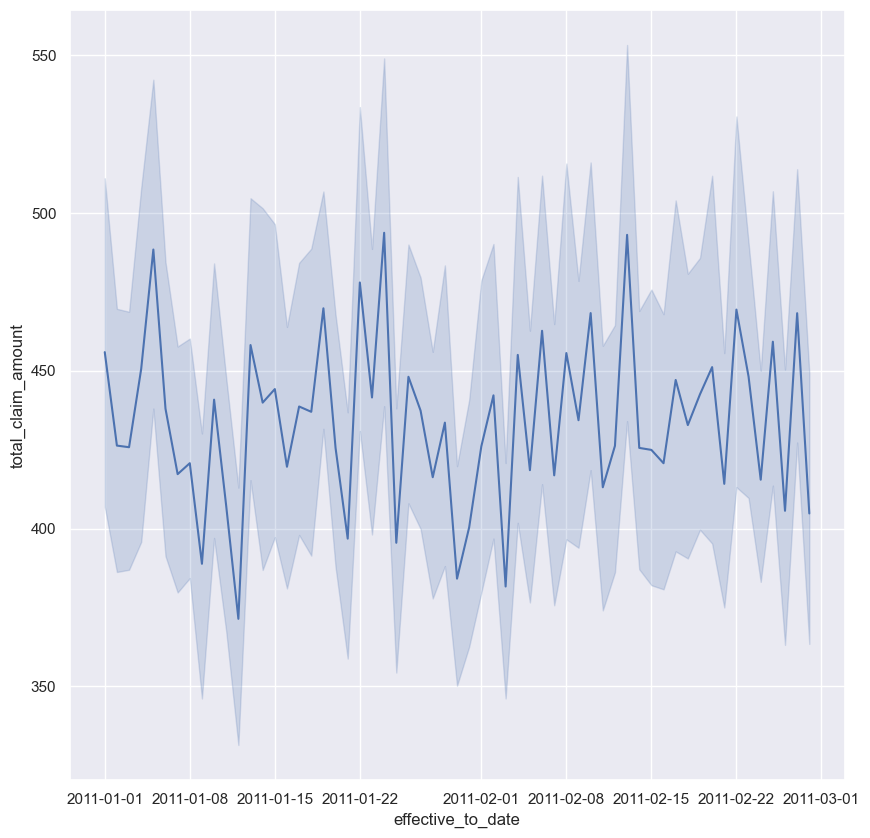

In [35]:
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=numerical_df)
plt.show()

In [36]:
new_df = pd.DataFrame()

new_df['day'] = numerical_df['effective_to_date'].dt.day
new_df['day_name'] = numerical_df['effective_to_date'].dt.day_name()
new_df['week'] = numerical_df['effective_to_date'].dt.isocalendar().week
new_df['month'] = numerical_df['effective_to_date'].dt.month_name()
new_df['total_claim_amount'] = numerical_df['total_claim_amount']

new_df.isna().sum()

day                   0
day_name              0
week                  0
month                 0
total_claim_amount    0
dtype: int64

In [37]:
new_df.head()

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


In [38]:
total_claim_by_day = new_df.groupby(new_df['day_name'])['total_claim_amount'].sum().round(2)
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_claim_by_day = new_df.groupby(new_df['day_name'])['total_claim_amount'].sum().round(2).reindex(list_of_correct_days)

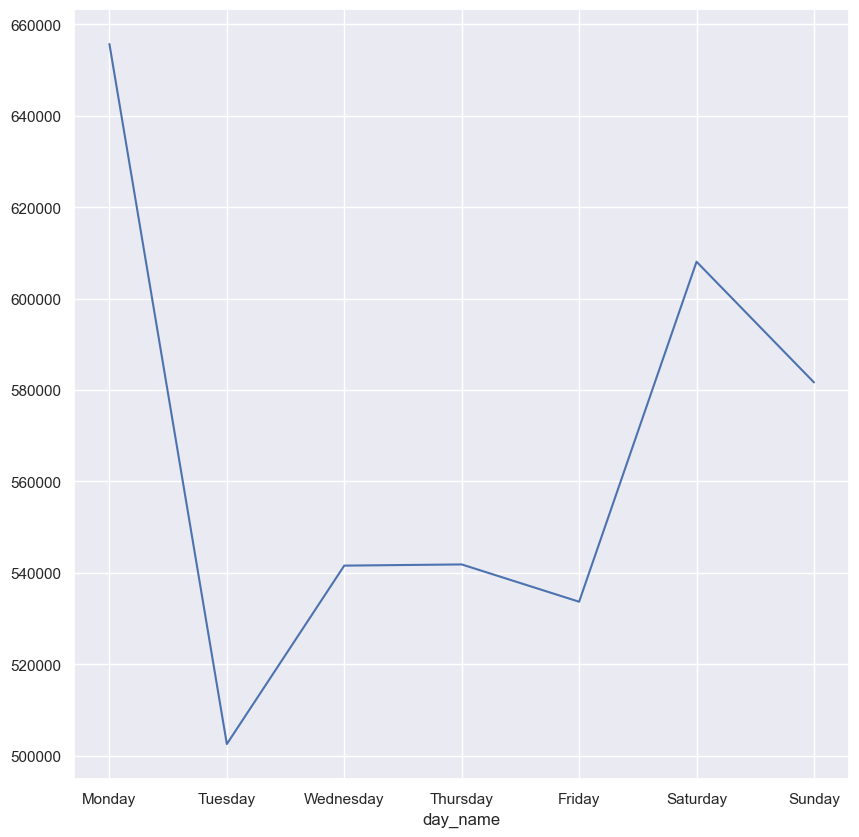

In [39]:
sns.lineplot(x=total_claim_by_day.index, y=total_claim_by_day.values)
plt.show()

In [40]:
total_claim_by_day = total_claim_by_day.reindex(index=list_of_correct_days)
total_claim_by_day

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

In [41]:
median_by_day = new_df.groupby('day_name')['total_claim_amount'].median().sort_values(ascending=False)
median_by_day

day_name
Thursday     395.328407
Wednesday    392.235698
Monday       385.735705
Sunday       383.721164
Saturday     379.200000
Tuesday      378.490829
Friday       371.803029
Name: total_claim_amount, dtype: float64

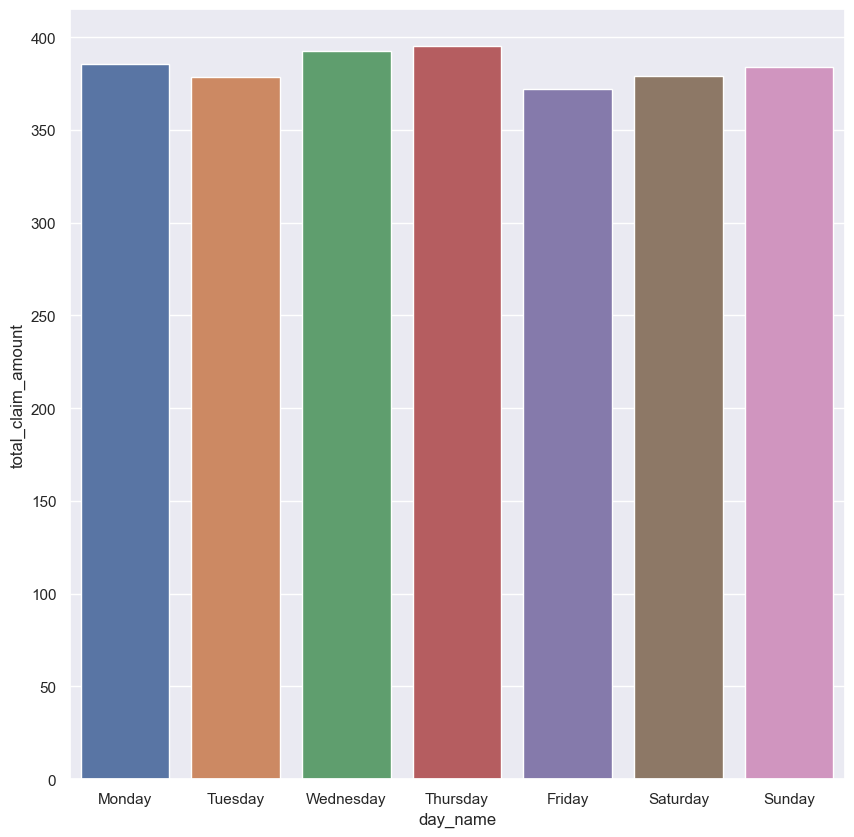

In [42]:
sns.barplot(x=median_by_day.index, y=median_by_day, order=list_of_correct_days)
plt.show()

In [43]:
#We can see that a higher number of claims made on Mondays, followed by Tuesdays, Wednesdays, Thursdays, Fridays, and Saturdays
#Sundays have the lowest number of claims made.

In [44]:
list_of_correct_values = sorted(new_df['month'].unique())
total_by_month = new_df.groupby(new_df['month'])['total_claim_amount'].sum().round(2)
total_by_month = total_by_month.reindex(index=list_of_correct_values)
total_by_month

month
February    1847824.19
January     2117142.86
Name: total_claim_amount, dtype: float64

In [45]:
#Yes, but only for months January and February which are the months we've in the df

In [46]:
continuous_df.shape
#continuous_df.isna().sum()

(9134, 6)

In [47]:
def remove_outliers(data, thr=3):
    for col in data.columns:
        mean = data[col].mean()
        std  = data[col].std()
        lower = mean - thr*std
        upper = mean + thr*std

        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

continuous_clean_df = remove_outliers(continuous_df)

In [48]:
continuous_clean_df.shape

(8575, 6)

In [49]:
continuous_clean_df

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,2011-02-24,56274,69,5,384.811147
1,6979.535903,2011-01-31,0,94,42,1131.464935
2,12887.431650,2011-02-19,48767,108,38,566.472247
3,7645.861827,2011-01-20,0,106,65,529.881344
4,2813.692575,2011-02-03,43836,73,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,2011-02-10,71941,73,89,198.234764
9130,3096.511217,2011-02-12,21604,79,28,379.200000
9131,8163.890428,2011-02-06,0,85,37,790.784983
9132,7524.442436,2011-02-03,21941,96,3,691.200000


In [50]:
concat_df = pd.concat([continuous_clean_df, discrete_df, categorical_df, new_df['month']], axis=1)
concat_df = concat_df.dropna().reset_index(drop=True)
concat_df.isna().sum()

customer_lifetime_value          0
effective_to_date                0
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
total_claim_amount               0
months_since_last_claim          0
number_of_open_complaints        0
number_of_policies               0
state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
month                            0
dtype: int64

In [51]:
concat_df

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,...,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
0,2763.519279,2011-02-24,56274.0,69.0,5.0,384.811147,32,0,1,Washington,...,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February
1,6979.535903,2011-01-31,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,...,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,January
2,12887.431650,2011-02-19,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,...,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February
3,7645.861827,2011-01-20,0.0,106.0,65.0,529.881344,18,0,7,California,...,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,January
4,2813.692575,2011-02-03,43836.0,73.0,44.0,138.130879,12,0,1,Washington,...,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,2011-02-10,71941.0,73.0,89.0,198.234764,18,0,2,California,...,Employed,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,February
8571,3096.511217,2011-02-12,21604.0,79.0,28.0,379.200000,14,0,1,California,...,Employed,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,February
8572,8163.890428,2011-02-06,0.0,85.0,37.0,790.784983,9,3,2,California,...,Unemployed,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,February
8573,7524.442436,2011-02-03,21941.0,96.0,3.0,691.200000,34,0,3,California,...,Employed,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,February


In [52]:
cols = list(concat_df.columns)
cols.append(cols.pop(cols.index('total_claim_amount')))
concat_df = concat_df.reindex(columns=cols)

In [53]:
concat_df['response'] = concat_df['response'].map({'Yes': 1, 'No': 0})
concat_df['response'].value_counts()

0    7339
1    1236
Name: response, dtype: int64

In [54]:
concat_df['education'] = concat_df.groupby(['education'])['education'].transform(lambda x: 'Graduate' if x.isin(['Master', 'Doctor']).any() else x)
concat_df['education'].value_counts()


Bachelor                2585
College                 2531
High School or Below    2441
Graduate                1018
Name: education, dtype: int64

In [55]:
concat_df['employmentstatus'] = concat_df.groupby(['employmentstatus'])['employmentstatus'].transform(lambda x: 'Inactive' if x.isin(["Medical Leave", "Disabled", "Retired"]).any() else x)
concat_df['employmentstatus'].value_counts()

Employed      5384
Unemployed    2127
Inactive      1064
Name: employmentstatus, dtype: int64

In [56]:
concat_df['gender'].value_counts()

F    4383
M    4192
Name: gender, dtype: int64

In [57]:
concat_df['gender'] = concat_df['gender'].replace({'M': 1, 'F': 0})
concat_df['gender'].value_counts()

0    4383
1    4192
Name: gender, dtype: int64

In [58]:
concat_df['vehicle_class'] = concat_df.groupby(['vehicle_class'])['vehicle_class'].transform(lambda x: 'Luxury' if x.isin(["Sports Car", "Luxury SUV", "Luxury Car"]).any() else x)
concat_df['vehicle_class'].value_counts()

Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Luxury            502
Name: vehicle_class, dtype: int64

In [59]:
concat_df.columns

Index(['customer_lifetime_value', 'effective_to_date', 'income',
       'monthly_premium_auto', 'months_since_policy_inception',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'month', 'total_claim_amount'],
      dtype='object')

In [60]:
coverage_dict = {'Basic': 1, 'Extended': 2, 'Premium': 3}
concat_df['coverage'] = concat_df['coverage'].replace(coverage_dict)
concat_df['coverage'].value_counts()

1    5353
2    2541
3     681
Name: coverage, dtype: int64

In [61]:
employmentstatus_dict = {'Employed': 1, 'Inactive': 2, 'Unemployed': 3}
concat_df['employmentstatus'] = concat_df['employmentstatus'].replace(employmentstatus_dict)
concat_df['employmentstatus'].value_counts()

1    5384
3    2127
2    1064
Name: employmentstatus, dtype: int64

In [62]:
location_code_dict = {'Urban': 1, 'Suburban': 2, 'Rural': 3}
concat_df['location_code'] = concat_df['location_code'].replace(location_code_dict)
concat_df['location_code'].value_counts()

2    5342
3    1710
1    1523
Name: location_code, dtype: int64

In [63]:
vehicle_size_dict = {'Large': 1, 'Medsize': 2, 'Small': 3}
concat_df['vehicle_size'] = concat_df['vehicle_size'].replace(vehicle_size_dict)
concat_df['vehicle_size'].value_counts()

2    6033
3    1644
1     898
Name: vehicle_size, dtype: int64

In [64]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8575 entries, 0 to 8574
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_lifetime_value        8575 non-null   float64       
 1   effective_to_date              8575 non-null   datetime64[ns]
 2   income                         8575 non-null   float64       
 3   monthly_premium_auto           8575 non-null   float64       
 4   months_since_policy_inception  8575 non-null   float64       
 5   months_since_last_claim        8575 non-null   int64         
 6   number_of_open_complaints      8575 non-null   int64         
 7   number_of_policies             8575 non-null   int64         
 8   state                          8575 non-null   object        
 9   response                       8575 non-null   int64         
 10  coverage                       8575 non-null   int64         
 11  education        

In [65]:
nominal_cols = concat_df.select_dtypes(include=['object'])
nominal_cols

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,month
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,February
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car,January
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,February
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV,January
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,February
...,...,...,...,...,...,...,...,...
8570,California,Bachelor,Married,L1,Offer2,Web,Four-Door Car,February
8571,California,College,Divorced,L3,Offer1,Branch,Four-Door Car,February
8572,California,Bachelor,Single,L2,Offer1,Branch,Four-Door Car,February
8573,California,College,Married,L2,Offer3,Branch,Four-Door Car,February


In [66]:
levels = [nominal_cols[col].unique().tolist() for col in nominal_cols.columns]
levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['February', 'January']]

In [67]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories=levels)


# Lab | Comparing regression models

In [68]:
X = concat_df.drop(['total_claim_amount'],axis=1)
y = concat_df['total_claim_amount']

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [70]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.shape

(6002, 13)

In [71]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.shape

(6002, 8)

In [72]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories=levels)
encoder.fit(categoricals_train)

categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded  = encoder.transform(categoricals_test).toarray()

categoricals_train_encoded = pd.DataFrame(categoricals_train_encoded, columns = encoder.get_feature_names_out())
categoricals_test_encoded  = pd.DataFrame(categoricals_test_encoded, columns = encoder.get_feature_names_out())
display(categoricals_train_encoded.head())
display(categoricals_test_encoded.head())


,state_Arizona,state_Nevada,state_California,state_Oregon,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L2,...,renew_offer_type_Offer3,renew_offer_type_Offer2,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,month_January
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,state_Arizona,state_Nevada,state_California,state_Oregon,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L2,...,renew_offer_type_Offer3,renew_offer_type_Offer2,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,month_January
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [73]:
categoricals_train_encoded.shape


(6002, 21)

In [74]:
categoricals_test_encoded.shape

(2573, 21)

In [75]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer() 
transformer.fit(numericals_train)

numericals_train_tranformer = transformer.transform(numericals_train)
numericals_test_tranformer  = transformer.transform(numericals_test)

X_train_num_transformed_df = pd.DataFrame(numericals_train_tranformer, columns = numericals_train.columns)
X_test_num_transformed_df  = pd.DataFrame(numericals_test_tranformer, columns = numericals_test.columns)
display(X_train_num_transformed_df.head())
display(X_test_num_transformed_df.head())
X_train_num_transformed_df.shape

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,gender,location_code,vehicle_size
0,1.254780,-1.662875,1.312075,-0.403151,-0.698167,-0.508609,-0.066679,-0.403674,1.193921,1.437959,1.017820,-0.020547,-0.156137
1,-1.502490,0.235429,-1.144354,1.275008,-0.135818,-0.508609,-1.134627,-0.403674,-0.773705,-0.763100,-0.982492,-1.657486,-0.156137
2,-1.758357,-1.662875,-1.541686,0.393123,0.245320,-0.508609,-1.134627,-0.403674,-0.773705,1.437959,-0.982492,1.596052,-0.156137
3,-0.076610,-1.662875,-0.071004,0.393123,-0.036060,1.921569,0.868793,-0.403674,1.193921,1.437959,1.017820,-0.020547,-0.156137
4,-0.826154,0.180443,0.807702,0.295321,-0.698167,-0.508609,-1.134627,2.477245,-0.773705,0.992661,-0.982492,-0.020547,-0.156137


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,gender,location_code,vehicle_size
0,-0.215250,0.896246,-1.144354,0.739978,-0.967315,2.023394,1.658115,2.477245,-0.773705,-0.7631,1.017820,-0.020547,-0.156137
1,0.866255,0.465699,1.312075,1.641510,1.192979,-0.508609,0.506547,-0.403674,1.193921,-0.7631,-0.982492,-0.020547,-0.156137
2,-0.324084,0.703730,1.249617,1.188241,1.399949,-0.508609,-1.134627,2.477245,-0.773705,-0.7631,1.017820,-0.020547,-0.156137
3,-1.115593,1.020217,-0.185418,-0.255762,-0.828374,-0.508609,-1.134627,-0.403674,1.193921,-0.7631,-0.982492,-1.657486,-2.049844
4,-0.249609,1.038877,-1.541686,-0.516907,-1.680526,-0.508609,1.306339,-0.403674,-0.773705,-0.7631,1.017820,1.596052,-0.156137


(6002, 13)

In [76]:
X_train_new = pd.concat([X_train_num_transformed_df,categoricals_train_encoded],axis=1)
X_test_new = pd.concat([X_test_num_transformed_df,categoricals_test_encoded],axis=1)

In [77]:
X_train_new.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,...,renew_offer_type_Offer3,renew_offer_type_Offer2,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,month_January
0,1.254780,-1.662875,1.312075,-0.403151,-0.698167,-0.508609,-0.066679,-0.403674,1.193921,1.437959,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.502490,0.235429,-1.144354,1.275008,-0.135818,-0.508609,-1.134627,-0.403674,-0.773705,-0.763100,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.758357,-1.662875,-1.541686,0.393123,0.245320,-0.508609,-1.134627,-0.403674,-0.773705,1.437959,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.076610,-1.662875,-0.071004,0.393123,-0.036060,1.921569,0.868793,-0.403674,1.193921,1.437959,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-0.826154,0.180443,0.807702,0.295321,-0.698167,-0.508609,-1.134627,2.477245,-0.773705,0.992661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [78]:
X_test_new.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,...,renew_offer_type_Offer3,renew_offer_type_Offer2,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,month_January
0,-0.215250,0.896246,-1.144354,0.739978,-0.967315,2.023394,1.658115,2.477245,-0.773705,-0.7631,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.866255,0.465699,1.312075,1.641510,1.192979,-0.508609,0.506547,-0.403674,1.193921,-0.7631,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.324084,0.703730,1.249617,1.188241,1.399949,-0.508609,-1.134627,2.477245,-0.773705,-0.7631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.115593,1.020217,-0.185418,-0.255762,-0.828374,-0.508609,-1.134627,-0.403674,1.193921,-0.7631,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.249609,1.038877,-1.541686,-0.516907,-1.680526,-0.508609,1.306339,-0.403674,-0.773705,-0.7631,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_new)
X_train_scaled = scaler.transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)
X_train_new_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train_new.columns.tolist())
X_test_new_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test_new.columns.tolist())

In [80]:
X_train_new_scaled_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,...,renew_offer_type_Offer3,renew_offer_type_Offer2,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,month_January
0,0.768989,0.000000,0.776334,0.453342,0.347162,0.000000,0.382401,0.0,0.82973,1.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.156696,0.683148,0.108090,0.902013,0.502666,0.000000,0.000000,0.0,0.00000,0.00000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.099877,0.000000,0.000000,0.666233,0.608060,0.000000,0.000000,0.0,0.00000,1.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.473334,0.000000,0.400083,0.666233,0.530251,0.958363,0.717367,0.0,0.82973,1.00000,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.306886,0.663360,0.639125,0.640085,0.347162,0.000000,0.000000,1.0,0.00000,0.79769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
X_test_new_scaled_df.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,...,renew_offer_type_Offer3,renew_offer_type_Offer2,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,month_January
0,0.442547,0.920958,0.108090,0.758968,0.272736,0.998518,1.000000,1.0,0.00000,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.682711,0.766016,0.776334,1.000000,0.870111,0.000000,0.587657,0.0,0.82973,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.418379,0.851677,0.759343,0.878815,0.927343,0.000000,0.000000,1.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.242612,0.965572,0.368958,0.492748,0.311157,0.000000,0.000000,0.0,0.82973,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.434917,0.972288,0.000000,0.422929,0.075515,0.000000,0.874039,0.0,0.00000,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [82]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_new_scaled_df, y_train)

y_pred_train = lm.predict(X_train_new_scaled_df)
y_pred_test = lm.predict(X_test_new_scaled_df)

In [83]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_pred_train)
print("The R2 of train lm is",round(r2_train,2))
r2_test = r2_score(y_test, y_pred_test)
print("The R2 of test lm is",round(r2_test,2))

The R2 of train lm is 0.53
The R2 of test lm is 0.52


In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def get_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    error_metrics = pd.DataFrame({
        'Error_metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
        'Value': [mae, mse, rmse, mape, r2]
    })
    
    return error_metrics

In [85]:
y_pred = lm.predict(X_test_new_scaled_df)
error_metrics = get_error_metrics(y_test, y_pred)
print(error_metrics)


  Error_metric         Value
0          MAE    119.512593
1          MSE  23721.382950
2         RMSE    154.017476
3         MAPE    169.191488
4           R2      0.516672


In [86]:
y_pred = lm.predict(X_train_new_scaled_df)
error_metrics = get_error_metrics(y_train, y_train)
print(error_metrics)

  Error_metric  Value
0          MAE    0.0
1          MSE    0.0
2         RMSE    0.0
3         MAPE    0.0
4           R2    1.0


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

def train_models(model_list, X_train, y_train, X_test, y_test):
    trained_models = []
    
    for model_name in model_list:
        if model_name == 'LinearRegression':
            model = LinearRegression()
        elif model_name == 'KNeighborsRegressor':
            model = KNeighborsRegressor()
        elif model_name == 'MLPRegressor':
            model = MLPRegressor()
        else:
            print('Error: Model {model_name} not recognized.')
            continue
            
        model.fit(X_train, y_train)
        trained_models.append(model)
        
    for model in trained_models:
        y_pred = model.predict(X_test)
        results_df = get_error_metrics(y_test, y_pred)
        print(f'Model: {type(model).__name__}')
        print(results_df)
    
    return trained_models

In [94]:
model_list = ['LinearRegression', 'KNeighborsRegressor', 'MLPRegressor']
trained_models = train_models(model_list, X_train_new_scaled_df, y_train, X_test_new_scaled_df, y_test)

C:\Users\celia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: LinearRegression
  Error_metric         Value
0          MAE    119.512593
1          MSE  23721.382950
2         RMSE    154.017476
3         MAPE    169.191488
4           R2      0.516672
Model: KNeighborsRegressor
  Error_metric         Value
0          MAE    125.992257
1          MSE  28839.641733
2         RMSE    169.822383
3         MAPE    214.606178
4           R2      0.412387
Model: MLPRegressor
  Error_metric         Value
0          MAE    109.788697
1          MSE  20853.805196
2         RMSE    144.408466
3         MAPE    157.478254
4           R2      0.575100
